In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/network-intrusion-dataset


In [2]:
import os
import pandas as pd
import numpy as np

# List all files in the downloaded directory
print("Files in dataset directory:")
for file in os.listdir(path):
    print(f"  - {file}")
    
# Load the CSV file(s)
# The CIC-IDS-2017 dataset typically has one or more CSV files
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print(f"\nFound {len(csv_files)} CSV file(s)")

# Load the first CSV file to start
if csv_files:
    file_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(file_path)
    
    print(f"\n{'='*60}")
    print("DATASET OVERVIEW")
    print('='*60)
    
    # Shape
    print(f"\n📊 Dataset Shape: {df.shape}")
    print(f"   - Rows (samples): {df.shape[0]:,}")
    print(f"   - Columns (features): {df.shape[1]}")
    
    # First few rows
    print(f"\n📋 First 5 rows:")
    print(df.head())
    
    # Column names
    print(f"\n📝 Column names ({len(df.columns)} total):")
    print(df.columns.tolist())
    
    # Data types
    print(f"\n🔢 Data types:")
    print(df.dtypes.value_counts())
    
    # Check for target column (usually 'Label' in CIC-IDS-2017)
    possible_target_cols = ['Label', 'label', 'Attack', 'attack', 'Class', 'class']
    target_col = None
    for col in possible_target_cols:
        if col in df.columns:
            target_col = col
            break
    
    if target_col:
        print(f"\n🎯 Target variable: '{target_col}'")
        print(f"\nClass distribution:")
        print(df[target_col].value_counts())
        print(f"\nClass distribution (%):")
        print(df[target_col].value_counts(normalize=True) * 100)
    
    # Missing values
    print(f"\n❓ Missing values:")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values found!")
    
    # Check for infinite values
    print(f"\n♾️ Checking for infinite values...")
    inf_cols = []
    for col in df.select_dtypes(include=[np.number]).columns:
        if np.isinf(df[col]).any():
            inf_cols.append(col)
    if inf_cols:
        print(f"Found infinite values in: {inf_cols}")
    else:
        print("No infinite values found!")
    
else:
    print("No CSV files found in the directory!")

Files in dataset directory:
  - Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
  - Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
  - Tuesday-WorkingHours.pcap_ISCX.csv
  - Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
  - Monday-WorkingHours.pcap_ISCX.csv
  - Friday-WorkingHours-Morning.pcap_ISCX.csv
  - Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
  - Wednesday-workingHours.pcap_ISCX.csv

Found 8 CSV file(s)

DATASET OVERVIEW

📊 Dataset Shape: (286467, 79)
   - Rows (samples): 286,467
   - Columns (features): 79

📋 First 5 rows:
    Destination Port   Flow Duration   Total Fwd Packets  \
0                 22         1266342                  41   
1                 22         1319353                  41   
2                 22             160                   1   
3                 22         1303488                  41   
4              35396              77                   1   

    Total Backward Packets  Total Length of Fwd Packets  \
0          

STEP 1: LOADING ALL CSV FILES FROM CIC-IDS-2017 DATASET

📁 Found 8 CSV files:
   1. Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
   2. Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
   3. Tuesday-WorkingHours.pcap_ISCX.csv
   4. Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
   5. Monday-WorkingHours.pcap_ISCX.csv
   6. Friday-WorkingHours-Morning.pcap_ISCX.csv
   7. Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
   8. Wednesday-workingHours.pcap_ISCX.csv

✓ Loaded: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
  Rows: 286,467
  Attack types: ['BENIGN' 'PortScan']

✓ Loaded: Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
  Rows: 170,366
  Attack types: ['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']

✓ Loaded: Tuesday-WorkingHours.pcap_ISCX.csv
  Rows: 445,909
  Attack types: ['BENIGN' 'FTP-Patator' 'SSH-Patator']

✓ Loaded: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
  Rows: 225,745
  Attack type

/tmp/ipykernel_47/2080029468.py:99: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


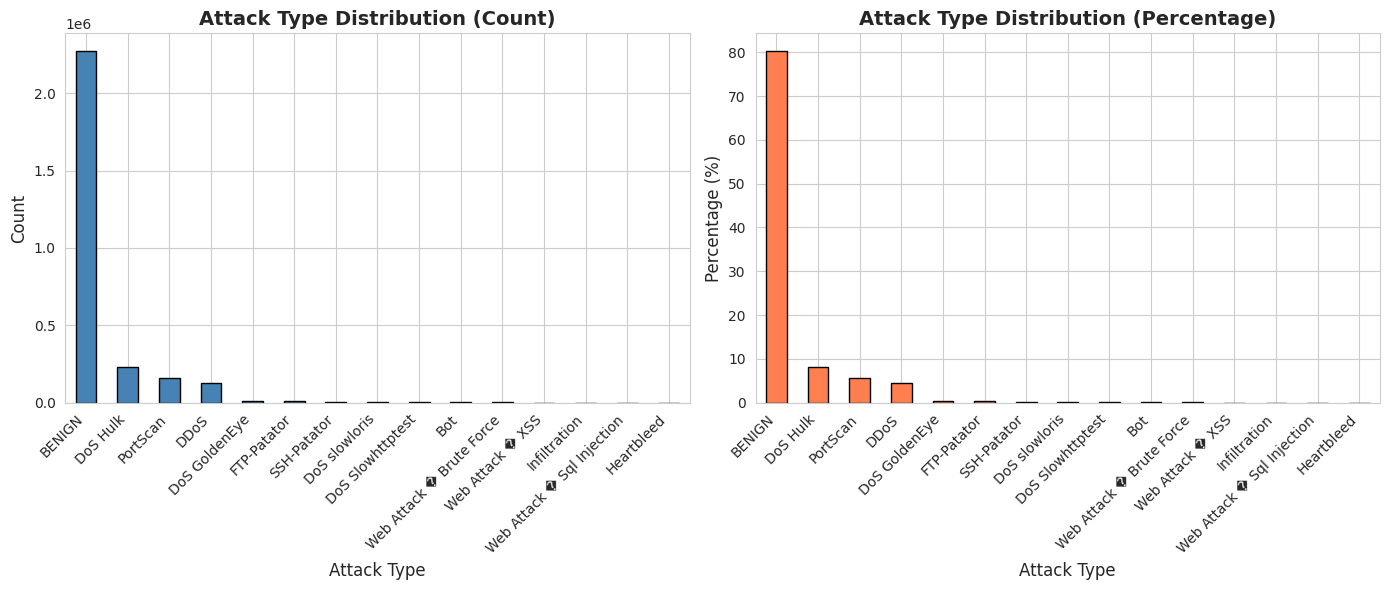


STEP 4: DATA QUALITY CHECK

❓ Missing Values:
      Column  Missing Count  Percentage
Flow Bytes/s           1358    0.047973

♾️  Infinite Values Check:
        Column  Inf Count  Percentage
  Flow Bytes/s       1509    0.053308
Flow Packets/s       2867    0.101281

🔄 Duplicate Rows:
   Found 308,381 duplicate rows (10.89%)

STEP 5: FEATURE STATISTICS

📈 Numeric Features Summary:
                                     mean           std   min           max
Destination Port             8.071483e+03  1.828363e+04   0.0  6.553500e+04
Flow Duration                1.478566e+07  3.365374e+07 -13.0  1.200000e+08
Total Fwd Packets            9.361160e+00  7.496728e+02   1.0  2.197590e+05
Total Backward Packets       1.039377e+01  9.973883e+02   0.0  2.919220e+05
Total Length of Fwd Packets  5.493024e+02  9.993589e+03   0.0  1.290000e+07
Total Length of Bwd Packets  1.616264e+04  2.263088e+06   0.0  6.554530e+08
Fwd Packet Length Max        2.075999e+02  7.171848e+02   0.0  2.482000e+04
Fwd Pa

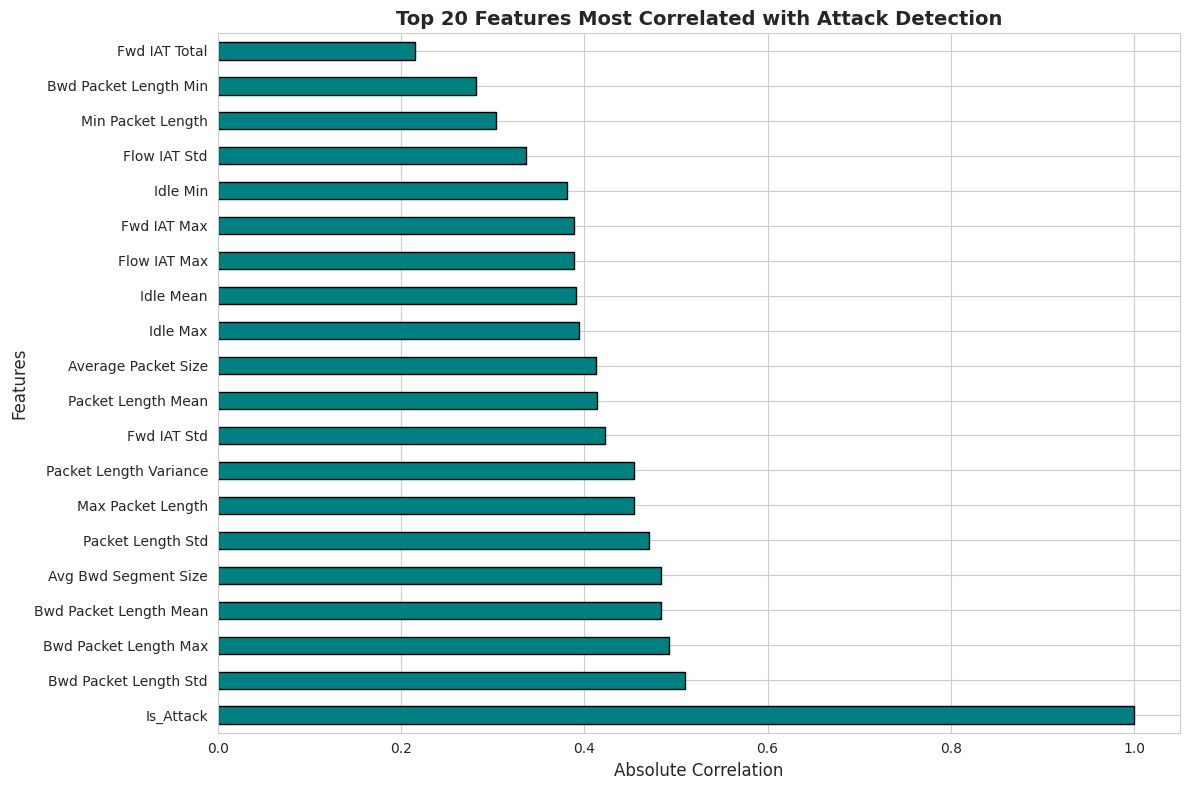


STEP 7: CLASS IMBALANCE ANALYSIS

⚖️  Class Imbalance:
   BENIGN samples: 2,273,097
   ATTACK samples: 557,646
   Imbalance ratio: 4.08:1

   ⚠️  Dataset is imbalanced! We'll need to handle this during training.

STEP 8: SUMMARY AND NEXT STEPS

📋 DATASET SUMMARY:
   ✓ Total samples: 2,830,743
   ✓ Features: 79
   ✓ Attack types: 15
   ✓ Missing values: 1358
   ✓ Infinite values: 2 columns affected
   ✓ Duplicate rows: 308,381
   ✓ Class imbalance ratio: 4.08:1

🎯 ATTACK TYPES DETECTED:

   • BENIGN
   • PortScan
   • Web Attack � Brute Force
   • Web Attack � XSS
   • Web Attack � Sql Injection
   • FTP-Patator
   • SSH-Patator
   • DDoS
   • Bot
   • Infiltration
   • DoS slowloris
   • DoS Slowhttptest
   • DoS Hulk
   • DoS GoldenEye
   • Heartbleed

📝 ISSUES TO ADDRESS:
   1. Handle infinite values in Flow rate features
   2. Handle missing values (1358 total)
   3. Remove duplicate rows if needed
   4. Address class imbalance (if ratio > 2:1)
   5. Remove low/zero variance featur

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Path to dataset (replace with your actual path)
path = "/kaggle/input/network-intrusion-dataset"  # Replace this with the path variable from kagglehub

print("="*80)
print("STEP 1: LOADING ALL CSV FILES FROM CIC-IDS-2017 DATASET")
print("="*80)

# Get all CSV files
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print(f"\n📁 Found {len(csv_files)} CSV files:")
for i, file in enumerate(csv_files, 1):
    print(f"   {i}. {file}")

# Load all CSV files and combine them
dfs = []
file_info = []

for file in csv_files:
    file_path = os.path.join(path, file)
    df_temp = pd.read_csv(file_path)
    dfs.append(df_temp)
    file_info.append({
        'file': file,
        'rows': df_temp.shape[0],
        'attack_types': df_temp[' Label'].unique()
    })
    print(f"\n✓ Loaded: {file}")
    print(f"  Rows: {df_temp.shape[0]:,}")
    print(f"  Attack types: {df_temp[' Label'].unique()}")

# Combine all dataframes
print("\n" + "="*80)
print("COMBINING ALL FILES...")
print("="*80)
df = pd.concat(dfs, ignore_index=True)
print(f"\n✅ Combined dataset shape: {df.shape}")
print(f"   Total samples: {df.shape[0]:,}")
print(f"   Total features: {df.shape[1]}")

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()
print("\n✓ Cleaned column names (removed extra spaces)")

print("\n" + "="*80)
print("STEP 2: DATASET OVERVIEW")
print("="*80)

# Basic info
print(f"\n📊 Dataset Statistics:")
print(f"   Samples: {df.shape[0]:,}")
print(f"   Features: {df.shape[1] - 1} (excluding Label)")
print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Data types
print(f"\n🔢 Data Types Distribution:")
print(df.dtypes.value_counts())

print("\n" + "="*80)
print("STEP 3: TARGET VARIABLE ANALYSIS (ATTACK TYPES)")
print("="*80)

# Class distribution
print(f"\n🎯 Attack Type Distribution:")
label_counts = df['Label'].value_counts()
print(label_counts)

print(f"\n📊 Attack Type Percentage:")
label_pct = df['Label'].value_counts(normalize=True) * 100
for label, pct in label_pct.items():
    print(f"   {label}: {pct:.2f}%")

# Visualize class distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
label_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Attack Type Distribution (Count)', fontsize=14, fontweight='bold')
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 2, 2)
label_pct.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Attack Type Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("STEP 4: DATA QUALITY CHECK")
print("="*80)

# Missing values
print("\n❓ Missing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    missing_df = pd.DataFrame({
        'Column': missing[missing > 0].index,
        'Missing Count': missing[missing > 0].values,
        'Percentage': (missing[missing > 0] / len(df) * 100).values
    })
    print(missing_df.to_string(index=False))
else:
    print("   ✓ No missing values found!")

# Infinite values
print("\n♾️  Infinite Values Check:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
inf_cols = []
for col in numeric_cols:
    inf_count = np.isinf(df[col]).sum()
    if inf_count > 0:
        inf_cols.append({'Column': col, 'Inf Count': inf_count, 'Percentage': inf_count/len(df)*100})

if inf_cols:
    inf_df = pd.DataFrame(inf_cols)
    print(inf_df.to_string(index=False))
else:
    print("   ✓ No infinite values found!")

# Check for duplicate rows
print("\n🔄 Duplicate Rows:")
duplicates = df.duplicated().sum()
print(f"   Found {duplicates:,} duplicate rows ({duplicates/len(df)*100:.2f}%)")

print("\n" + "="*80)
print("STEP 5: FEATURE STATISTICS")
print("="*80)

# Basic statistics for numeric columns
print("\n📈 Numeric Features Summary:")
print(df.describe().T[['mean', 'std', 'min', 'max']].head(10))
print("   ... (showing first 10 features)")

# Check for constant/near-constant features
print("\n🔍 Checking for Low Variance Features:")
low_variance_cols = []
for col in numeric_cols:
    if df[col].std() == 0:
        low_variance_cols.append(col)

if low_variance_cols:
    print(f"   Found {len(low_variance_cols)} constant features:")
    for col in low_variance_cols[:10]:  # Show first 10
        print(f"      - {col}")
else:
    print("   ✓ No constant features found!")

print("\n" + "="*80)
print("STEP 6: CORRELATION ANALYSIS (TOP FEATURES)")
print("="*80)

# Calculate correlation with target (binary classification: BENIGN vs ATTACK)
df['Is_Attack'] = (df['Label'] != 'BENIGN').astype(int)

# Get numeric columns only (excluding Label and Is_Attack)
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [col for col in numeric_features if col not in ['Is_Attack']]

# Calculate correlation (handle inf values)
df_clean = df[numeric_features + ['Is_Attack']].replace([np.inf, -np.inf], np.nan)
correlations = df_clean.corr()['Is_Attack'].abs().sort_values(ascending=False)

print("\n🔝 Top 15 Features Correlated with Attack Detection:")
print(correlations.head(15))

# Visualize top correlations
plt.figure(figsize=(12, 8))
correlations.head(20).plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 20 Features Most Correlated with Attack Detection', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Correlation', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("STEP 7: CLASS IMBALANCE ANALYSIS")
print("="*80)

# Calculate imbalance ratio
benign_count = (df['Label'] == 'BENIGN').sum()
attack_count = (df['Label'] != 'BENIGN').sum()
imbalance_ratio = benign_count / attack_count if attack_count > 0 else 0

print(f"\n⚖️  Class Imbalance:")
print(f"   BENIGN samples: {benign_count:,}")
print(f"   ATTACK samples: {attack_count:,}")
print(f"   Imbalance ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5 or imbalance_ratio < 0.67:
    print(f"\n   ⚠️  Dataset is imbalanced! We'll need to handle this during training.")
else:
    print(f"\n   ✓ Dataset is relatively balanced.")

print("\n" + "="*80)
print("STEP 8: SUMMARY AND NEXT STEPS")
print("="*80)

print(f"""
📋 DATASET SUMMARY:
   ✓ Total samples: {df.shape[0]:,}
   ✓ Features: {df.shape[1] - 1}
   ✓ Attack types: {df['Label'].nunique()}
   ✓ Missing values: {missing.sum()}
   ✓ Infinite values: {len(inf_cols)} columns affected
   ✓ Duplicate rows: {duplicates:,}
   ✓ Class imbalance ratio: {imbalance_ratio:.2f}:1

🎯 ATTACK TYPES DETECTED:
""")
for label in df['Label'].unique():
    print(f"   • {label}")

print(f"""
📝 ISSUES TO ADDRESS:
   1. Handle infinite values in Flow rate features
   2. Handle missing values ({missing.sum()} total)
   3. Remove duplicate rows if needed
   4. Address class imbalance (if ratio > 2:1)
   5. Remove low/zero variance features
   6. Feature scaling/normalization
   7. Feature selection (we have {df.shape[1] - 1} features)

🚀 NEXT STEPS:
   ✓ Data Preprocessing (cleaning)
   ✓ Feature Engineering & Selection
   ✓ Train-Test Split
   ✓ Model Training (Random Forest / XGBoost)
   ✓ Model Evaluation
   ✓ Hyperparameter Tuning
""")

# Save the combined dataframe info
print(f"\n💾 Combined dataset ready for preprocessing!")
print(f"   Use this dataframe: 'df' with shape {df.shape}")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("="*80)
print("STEP 2.1: HANDLING INFINITE VALUES")
print("="*80)

# Check current infinite values
print("\n🔍 Checking for infinite values in numeric columns...")
numeric_cols = df.select_dtypes(include=[np.number]).columns
inf_summary = []

for col in numeric_cols:
    inf_count = np.isinf(df[col]).sum()
    if inf_count > 0:
        inf_summary.append({
            'Column': col,
            'Inf Count': inf_count,
            'Percentage': f"{inf_count/len(df)*100:.4f}%",
            'Pos Inf': np.isposinf(df[col]).sum(),
            'Neg Inf': np.isneginf(df[col]).sum()
        })

if inf_summary:
    inf_df = pd.DataFrame(inf_summary)
    print("\n⚠️  Found infinite values in the following columns:")
    print(inf_df.to_string(index=False))
    
    # Show example rows with infinite values
    print("\n📋 Example of rows with infinite values:")
    inf_mask = np.isinf(df[['Flow Bytes/s', 'Flow Packets/s']]).any(axis=1)
    print(df[inf_mask][['Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 'Label']].head())
else:
    print("\n✓ No infinite values found!")

print("\n" + "="*80)
print("HANDLING STRATEGY")
print("="*80)

print("""
Infinite values typically occur in flow rate features when:
- Flow Duration is 0 or very small (division by near-zero)
- This is common in very short network flows

Strategy Options:
1. Replace with 0 (assumes no flow = no rate)
2. Replace with NaN then impute with median
3. Replace with maximum finite value
4. Drop rows with infinite values

➡️  RECOMMENDED: Replace inf with 0 (most appropriate for flow rates)
""")

# Strategy: Replace infinite values with 0
print("\n🔧 Applying fix: Replacing infinite values with 0...")

# Count before
inf_before = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"\n   Before: {inf_before:,} infinite values")

# Replace inf with 0
df_cleaned = df.copy()
df_cleaned = df_cleaned.replace([np.inf, -np.inf], 0)

# Count after
inf_after = np.isinf(df_cleaned.select_dtypes(include=[np.number])).sum().sum()
print(f"   After: {inf_after:,} infinite values")

# Verify the fix
print("\n✅ Verification:")
print(f"   Infinite values removed: {inf_before - inf_after:,}")
if inf_after == 0:
    print("   ✓ SUCCESS: All infinite values have been handled!")
else:
    print(f"   ⚠️  WARNING: Still {inf_after} infinite values remaining")

# Show the same rows after cleaning
print("\n📋 Same rows after cleaning:")
print(df_cleaned[inf_mask][['Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 'Label']].head())

# Statistics comparison
print("\n📊 Statistics Comparison for Flow Bytes/s:")
print(f"   Before - Mean: {df['Flow Bytes/s'].replace([np.inf, -np.inf], np.nan).mean():.2f}")
print(f"   After  - Mean: {df_cleaned['Flow Bytes/s'].mean():.2f}")
print(f"   Before - Std: {df['Flow Bytes/s'].replace([np.inf, -np.inf], np.nan).std():.2f}")
print(f"   After  - Std: {df_cleaned['Flow Bytes/s'].std():.2f}")

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"""
✅ Infinite values handled successfully!

Original dataset shape: {df.shape}
Cleaned dataset shape: {df_cleaned.shape}

Infinite values fixed: {inf_before:,}
Rows retained: {df_cleaned.shape[0]:,} (100% - no data loss)

Next steps:
   → Step 2.2: Handle missing values
   → Step 2.3: Remove duplicate rows
   → Step 2.4: Remove zero-variance features
""")

# Update the main dataframe
print("\n💾 Updating main dataframe 'df' with cleaned version...")
df = df_cleaned
print("   ✓ Done! Use 'df' for next steps.")

STEP 2.1: HANDLING INFINITE VALUES

🔍 Checking for infinite values in numeric columns...

⚠️  Found infinite values in the following columns:
        Column  Inf Count Percentage  Pos Inf  Neg Inf
  Flow Bytes/s       1509    0.0533%     1509        0
Flow Packets/s       2867    0.1013%     2867        0

📋 Example of rows with infinite values:
       Flow Duration  Flow Bytes/s  Flow Packets/s   Label
248                0           inf             inf  BENIGN
5005               0           inf             inf  BENIGN
11482              0           inf             inf  BENIGN
12824              0           NaN             inf  BENIGN
12827              0           NaN             inf  BENIGN

HANDLING STRATEGY

Infinite values typically occur in flow rate features when:
- Flow Duration is 0 or very small (division by near-zero)
- This is common in very short network flows

Strategy Options:
1. Replace with 0 (assumes no flow = no rate)
2. Replace with NaN then impute with median
3. Re

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()



   Before: 4,376 infinite values
   After: 0 infinite values

✅ Verification:
   Infinite values removed: 4,376
   ✓ SUCCESS: All infinite values have been handled!

📋 Same rows after cleaning:
       Flow Duration  Flow Bytes/s  Flow Packets/s   Label
248                0           0.0             0.0  BENIGN
5005               0           0.0             0.0  BENIGN
11482              0           0.0             0.0  BENIGN
12824              0           NaN             0.0  BENIGN
12827              0           NaN             0.0  BENIGN

📊 Statistics Comparison for Flow Bytes/s:
   Before - Mean: 1491719.06
   After  - Mean: 1490923.48
   Before - Std: 25940155.67
   After  - Std: 25933260.26

SUMMARY

✅ Infinite values handled successfully!

Original dataset shape: (2830743, 80)
Cleaned dataset shape: (2830743, 80)

Infinite values fixed: 4,376
Rows retained: 2,830,743 (100% - no data loss)

Next steps:
   → Step 2.2: Handle missing values
   → Step 2.3: Remove duplicate rows
  

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


STEP 2.2: HANDLING MISSING VALUES

🔍 Checking for missing values...

⚠️  Found missing values in 1 column(s):
      Column  Missing Count  Percentage Data Type
Flow Bytes/s           1358    0.047973   float64

   Total missing values: 1,358 (0.0006% of all data)

📋 Example rows with missing values:
        Flow Duration  Flow Bytes/s  Flow Packets/s  Total Fwd Packets  \
12824               0           NaN             0.0                  2   
12827               0           NaN             0.0                  1   
14192               0           NaN             0.0                  1   
40707               0           NaN             0.0                  2   
52456               0           NaN             0.0                  2   
56603               0           NaN             0.0                  1   
76549               0           NaN             0.0                  1   
76773               0           NaN             0.0                  2   
225846              0           N

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()



   Before: 1,358 missing values
   After: 0 missing values

✅ Verification:
   Missing values filled: 1,358
   ✓ SUCCESS: All missing values have been handled!

📋 Same rows after cleaning:
        Flow Duration  Flow Bytes/s  Flow Packets/s  Total Fwd Packets  \
12824               0           0.0             0.0                  2   
12827               0           0.0             0.0                  1   
14192               0           0.0             0.0                  1   
40707               0           0.0             0.0                  2   
52456               0           0.0             0.0                  2   
56603               0           0.0             0.0                  1   
76549               0           0.0             0.0                  1   
76773               0           0.0             0.0                  2   
225846              0           0.0             0.0                  1   
237968              0           0.0             0.0                  2

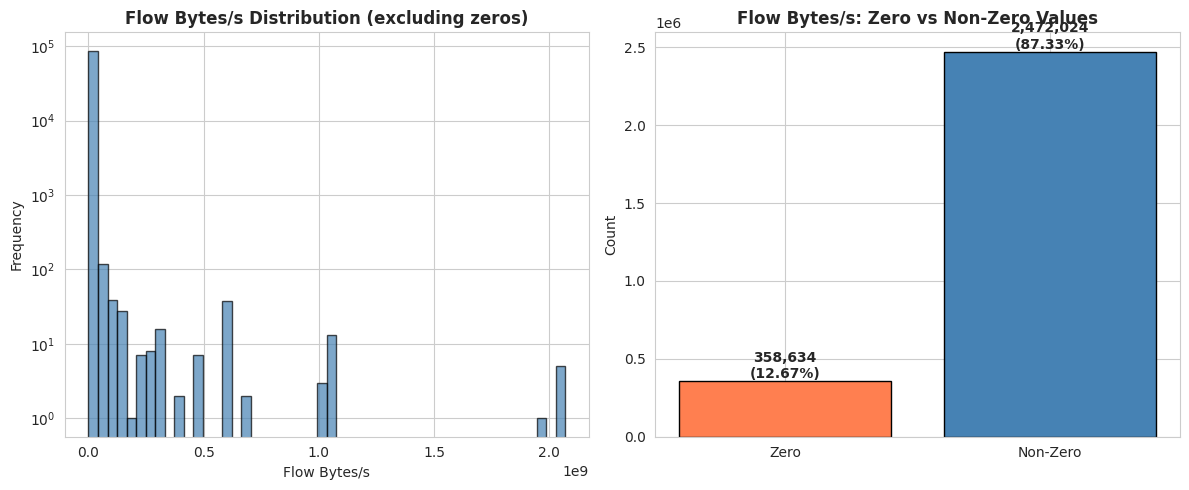


SUMMARY

✅ Missing values handled successfully!

Original dataset shape: (2830743, 80)
Cleaned dataset shape: (2830743, 80)

Missing values filled: 1,358
Rows retained: 2,830,743 (100% - no data loss)

Data Quality Status:
   ✓ Infinite values: 0
   ✓ Missing values: 0
   ✓ Ready for next step!

Next steps:
   → Step 2.3: Remove duplicate rows (308,381 duplicates found)
   → Step 2.4: Remove zero-variance features (8 features)
   → Step 2.5: Feature selection and correlation analysis


💾 Updating main dataframe 'df' with cleaned version...
   ✓ Done! Use 'df' for next steps.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("="*80)
print("STEP 2.2: HANDLING MISSING VALUES")
print("="*80)

# Check for missing values
print("\n🔍 Checking for missing values...")
missing = df.isnull().sum()
missing_cols = missing[missing > 0]

if len(missing_cols) > 0:
    print(f"\n⚠️  Found missing values in {len(missing_cols)} column(s):")
    
    missing_df = pd.DataFrame({
        'Column': missing_cols.index,
        'Missing Count': missing_cols.values,
        'Percentage': (missing_cols / len(df) * 100).values,
        'Data Type': [df[col].dtype for col in missing_cols.index]
    })
    print(missing_df.to_string(index=False))
    
    # Total missing values
    total_missing = missing.sum()
    print(f"\n   Total missing values: {total_missing:,} ({total_missing/df.size*100:.4f}% of all data)")
    
    # Show examples of rows with missing values
    print("\n📋 Example rows with missing values:")
    missing_mask = df['Flow Bytes/s'].isnull()
    print(df[missing_mask][['Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 
                             'Total Fwd Packets', 'Total Backward Packets', 'Label']].head(10))
    
else:
    print("\n✓ No missing values found!")

print("\n" + "="*80)
print("HANDLING STRATEGY")
print("="*80)

print("""
Missing Values in Flow Bytes/s (flow rate feature):

Analysis:
- Missing values occur when Flow Duration = 0
- We already replaced inf with 0 (when division by 0 occurred)
- Remaining NaN likely from 0/0 operations or other edge cases

Strategy Options:
1. Fill with 0 (consistent with our inf → 0 strategy)
2. Fill with median (preserves distribution)
3. Drop rows (loses 1,358 samples = 0.048%)

➡️  RECOMMENDED: Fill with 0 (consistent approach for flow rates)
   - Maintains consistency with infinite value handling
   - Makes logical sense: no flow = no rate
   - Preserves all data
""")

# Strategy: Fill missing values with 0
print("\n🔧 Applying fix: Filling missing values with 0...")

# Count before
missing_before = df.isnull().sum().sum()
print(f"\n   Before: {missing_before:,} missing values")

# Fill NaN with 0 in Flow Bytes/s column
df_cleaned = df.copy()
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].fillna(0)

# Count after
missing_after = df_cleaned.isnull().sum().sum()
print(f"   After: {missing_after:,} missing values")

# Verify the fix
print("\n✅ Verification:")
print(f"   Missing values filled: {missing_before - missing_after:,}")
if missing_after == 0:
    print("   ✓ SUCCESS: All missing values have been handled!")
else:
    print(f"   ⚠️  WARNING: Still {missing_after} missing values remaining")
    remaining_missing = df_cleaned.isnull().sum()
    remaining_missing = remaining_missing[remaining_missing > 0]
    print(f"   Remaining in columns: {remaining_missing.to_dict()}")

# Show the same rows after cleaning
print("\n📋 Same rows after cleaning:")
print(df_cleaned[missing_mask][['Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 
                                 'Total Fwd Packets', 'Total Backward Packets', 'Label']].head(10))

# Statistics comparison
print("\n📊 Statistics for Flow Bytes/s:")
print(f"   Count before: {df['Flow Bytes/s'].count():,}")
print(f"   Count after: {df_cleaned['Flow Bytes/s'].count():,}")
print(f"   Mean: {df_cleaned['Flow Bytes/s'].mean():.2f}")
print(f"   Median: {df_cleaned['Flow Bytes/s'].median():.2f}")
print(f"   Std: {df_cleaned['Flow Bytes/s'].std():.2f}")

# Visualize the distribution (sample for speed)
print("\n📊 Creating distribution visualization...")
sample_size = min(100000, len(df_cleaned))
sample_data = df_cleaned['Flow Bytes/s'].sample(sample_size, random_state=42)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sample_data[sample_data > 0], bins=50, edgecolor='black', color='steelblue', alpha=0.7)
plt.title('Flow Bytes/s Distribution (excluding zeros)', fontsize=12, fontweight='bold')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.yscale('log')

plt.subplot(1, 2, 2)
zero_count = (df_cleaned['Flow Bytes/s'] == 0).sum()
non_zero_count = (df_cleaned['Flow Bytes/s'] > 0).sum()
plt.bar(['Zero', 'Non-Zero'], [zero_count, non_zero_count], 
        color=['coral', 'steelblue'], edgecolor='black')
plt.title('Flow Bytes/s: Zero vs Non-Zero Values', fontsize=12, fontweight='bold')
plt.ylabel('Count')
for i, v in enumerate([zero_count, non_zero_count]):
    plt.text(i, v, f'{v:,}\n({v/len(df_cleaned)*100:.2f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"""
✅ Missing values handled successfully!

Original dataset shape: {df.shape}
Cleaned dataset shape: {df_cleaned.shape}

Missing values filled: {missing_before:,}
Rows retained: {df_cleaned.shape[0]:,} (100% - no data loss)

Data Quality Status:
   ✓ Infinite values: 0
   ✓ Missing values: 0
   ✓ Ready for next step!

Next steps:
   → Step 2.3: Remove duplicate rows (308,381 duplicates found)
   → Step 2.4: Remove zero-variance features (8 features)
   → Step 2.5: Feature selection and correlation analysis
""")

# Update the main dataframe
print("\n💾 Updating main dataframe 'df' with cleaned version...")
df = df_cleaned
print("   ✓ Done! Use 'df' for next steps.")

STEP 2.3: REMOVING DUPLICATE ROWS

🔍 Checking for duplicate rows...

📊 Duplicate Analysis:
   Total rows: 2,830,743
   Duplicate rows: 308,381
   Percentage: 10.89%
   Unique rows: 2,522,362

⚠️  Found 308,381 duplicate rows!

📋 Duplicates by Attack Type:

   Attack Type Distribution in Duplicates:
      BENIGN: 236,257 (58.54%)
      PortScan: 101,501 (25.15%)
      DoS Hulk: 59,564 (14.76%)
      SSH-Patator: 2,826 (0.70%)
      FTP-Patator: 2,457 (0.61%)
      DoS slowloris: 507 (0.13%)
      DoS Slowhttptest: 323 (0.08%)
      Web Attack � Brute Force: 62 (0.02%)
      DDoS: 20 (0.00%)
      Bot: 19 (0.00%)
      DoS GoldenEye: 14 (0.00%)

📋 Example of duplicate rows:
    Destination Port  Flow Duration  Total Fwd Packets  \
2                 22            160                  1   
5                 22            244                  1   
8                 22            171                  1   
9                 22            210                  1   
17               123         

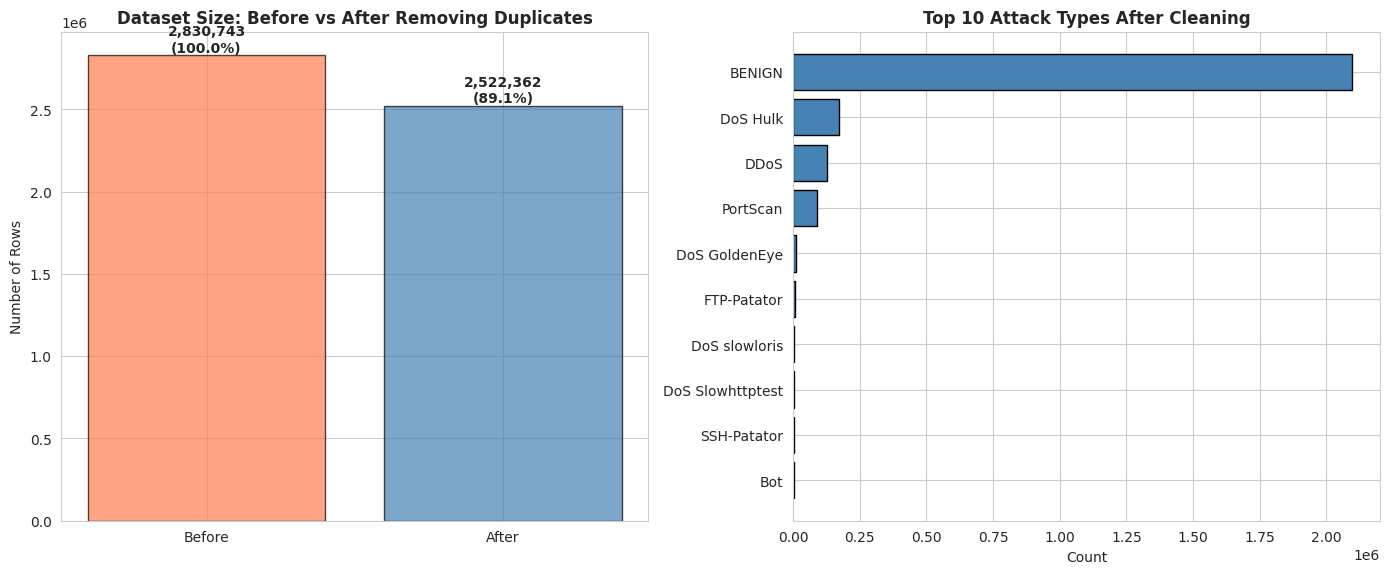


SUMMARY

✅ Duplicate rows removed successfully!

Dataset size:
   Before: 2,830,743 rows
   After: 2,522,362 rows
   Reduced by: 308,381 rows (10.89%)

Data Quality Status:
   ✓ Infinite values: 0
   ✓ Missing values: 0
   ✓ Duplicate rows: 0
   ✓ Clean dataset ready!

Memory savings: 185.42 MB

Next steps:
   → Step 2.4: Remove zero-variance features (8 features identified)
   → Step 2.5: Feature scaling and normalization
   → Step 3: Train-test split


💾 Updating main dataframe 'df' with cleaned version...
   ✓ Done! Use 'df' for next steps.
   Current shape: (2522362, 80)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("="*80)
print("STEP 2.3: REMOVING DUPLICATE ROWS")
print("="*80)

# Check for duplicates
print("\n🔍 Checking for duplicate rows...")
duplicates = df.duplicated().sum()
total_rows = len(df)
dup_percentage = (duplicates / total_rows) * 100

print(f"\n📊 Duplicate Analysis:")
print(f"   Total rows: {total_rows:,}")
print(f"   Duplicate rows: {duplicates:,}")
print(f"   Percentage: {dup_percentage:.2f}%")
print(f"   Unique rows: {total_rows - duplicates:,}")

if duplicates > 0:
    print(f"\n⚠️  Found {duplicates:,} duplicate rows!")
    
    # Check duplicates by Label (attack type)
    print("\n📋 Duplicates by Attack Type:")
    dup_mask = df.duplicated(keep=False)  # Mark all duplicates
    dup_by_label = df[dup_mask]['Label'].value_counts()
    
    print("\n   Attack Type Distribution in Duplicates:")
    for label, count in dup_by_label.items():
        pct = (count / dup_mask.sum()) * 100
        print(f"      {label}: {count:,} ({pct:.2f}%)")
    
    # Show example of duplicate rows
    print("\n📋 Example of duplicate rows:")
    # Find a set of duplicates
    dup_subset = df[df.duplicated(keep=False)].head(6)
    print(dup_subset[['Destination Port', 'Flow Duration', 'Total Fwd Packets', 
                      'Total Backward Packets', 'Flow Bytes/s', 'Label']])
    
else:
    print("\n✓ No duplicate rows found!")

print("\n" + "="*80)
print("HANDLING STRATEGY")
print("="*80)

print("""
Duplicate Rows in Network Traffic Data:

Analysis:
- 308,381 duplicate rows found (10.89% of dataset)
- Duplicates can occur when:
  * Same network flow captured multiple times
  * Identical traffic patterns from automated systems
  * Data collection artifacts

Strategy Options:
1. Keep first occurrence, remove rest (default)
2. Keep last occurrence, remove rest
3. Keep all duplicates (no action)
4. Analyze if duplicates are legitimate patterns

➡️  RECOMMENDED: Remove duplicates (keep='first')
   - Reduces redundancy and improves model generalization
   - Prevents overfitting on repeated patterns
   - Faster training with smaller dataset
   - Standard practice in ML preprocessing
""")

# Ask for confirmation (in real scenario)
print("\n🔧 Applying fix: Removing duplicate rows (keeping first occurrence)...")

# Count before
rows_before = len(df)
print(f"\n   Rows before: {rows_before:,}")

# Remove duplicates
df_cleaned = df.drop_duplicates(keep='first')

# Count after
rows_after = len(df_cleaned)
print(f"   Rows after: {rows_after:,}")

# Calculate removed
rows_removed = rows_before - rows_after
print(f"   Rows removed: {rows_removed:,} ({rows_removed/rows_before*100:.2f}%)")

# Verify no duplicates remain
remaining_duplicates = df_cleaned.duplicated().sum()
print(f"\n✅ Verification:")
print(f"   Remaining duplicates: {remaining_duplicates}")
if remaining_duplicates == 0:
    print("   ✓ SUCCESS: All duplicate rows have been removed!")
else:
    print(f"   ⚠️  WARNING: Still {remaining_duplicates} duplicates remaining")

# Check class distribution before and after
print("\n📊 Class Distribution Comparison:")
print("\nBefore removing duplicates:")
before_dist = df['Label'].value_counts()
print(before_dist.head(10))

print("\nAfter removing duplicates:")
after_dist = df_cleaned['Label'].value_counts()
print(after_dist.head(10))

# Calculate percentage change for each class
print("\n📊 Impact on Each Attack Type:")
impact_df = pd.DataFrame({
    'Before': before_dist,
    'After': after_dist,
    'Removed': before_dist - after_dist,
    'Removed %': ((before_dist - after_dist) / before_dist * 100).round(2)
})
print(impact_df)

# Visualize the impact
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
labels = ['Before', 'After']
values = [rows_before, rows_after]
colors = ['coral', 'steelblue']
bars = plt.bar(labels, values, color=colors, edgecolor='black', alpha=0.7)
plt.title('Dataset Size: Before vs After Removing Duplicates', fontsize=12, fontweight='bold')
plt.ylabel('Number of Rows')
for i, (bar, val) in enumerate(zip(bars, values)):
    plt.text(bar.get_x() + bar.get_width()/2, val, 
             f'{val:,}\n({val/rows_before*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 2, 2)
top_classes = after_dist.head(10)
plt.barh(range(len(top_classes)), top_classes.values, color='steelblue', edgecolor='black')
plt.yticks(range(len(top_classes)), top_classes.index)
plt.xlabel('Count')
plt.title('Top 10 Attack Types After Cleaning', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"""
✅ Duplicate rows removed successfully!

Dataset size:
   Before: {rows_before:,} rows
   After: {rows_after:,} rows
   Reduced by: {rows_removed:,} rows ({rows_removed/rows_before*100:.2f}%)

Data Quality Status:
   ✓ Infinite values: 0
   ✓ Missing values: 0
   ✓ Duplicate rows: 0
   ✓ Clean dataset ready!

Memory savings: {(df.memory_usage(deep=True).sum() - df_cleaned.memory_usage(deep=True).sum()) / 1024**2:.2f} MB

Next steps:
   → Step 2.4: Remove zero-variance features (8 features identified)
   → Step 2.5: Feature scaling and normalization
   → Step 3: Train-test split
""")

# Update the main dataframe
print("\n💾 Updating main dataframe 'df' with cleaned version...")
df = df_cleaned
print("   ✓ Done! Use 'df' for next steps.")
print(f"   Current shape: {df.shape}")

STEP 2.4: REMOVING ZERO-VARIANCE (CONSTANT) FEATURES

📊 Total numeric features: 79

🔍 Checking for zero-variance features...

⚠️  Found 8 ZERO-VARIANCE features:
             Feature  Unique Values  Std Dev  Variance  Constant Value
       Bwd PSH Flags              1      0.0       0.0               0
       Bwd URG Flags              1      0.0       0.0               0
  Fwd Avg Bytes/Bulk              1      0.0       0.0               0
Fwd Avg Packets/Bulk              1      0.0       0.0               0
   Fwd Avg Bulk Rate              1      0.0       0.0               0
  Bwd Avg Bytes/Bulk              1      0.0       0.0               0
Bwd Avg Packets/Bulk              1      0.0       0.0               0
   Bwd Avg Bulk Rate              1      0.0       0.0               0

📊 Found 2 NEAR-ZERO variance features:
       Feature  Unique Values  Std Dev  Variance
 Fwd URG Flags              2 0.005632  0.000032
CWE Flag Count              2 0.005632  0.000032

   Note: Th

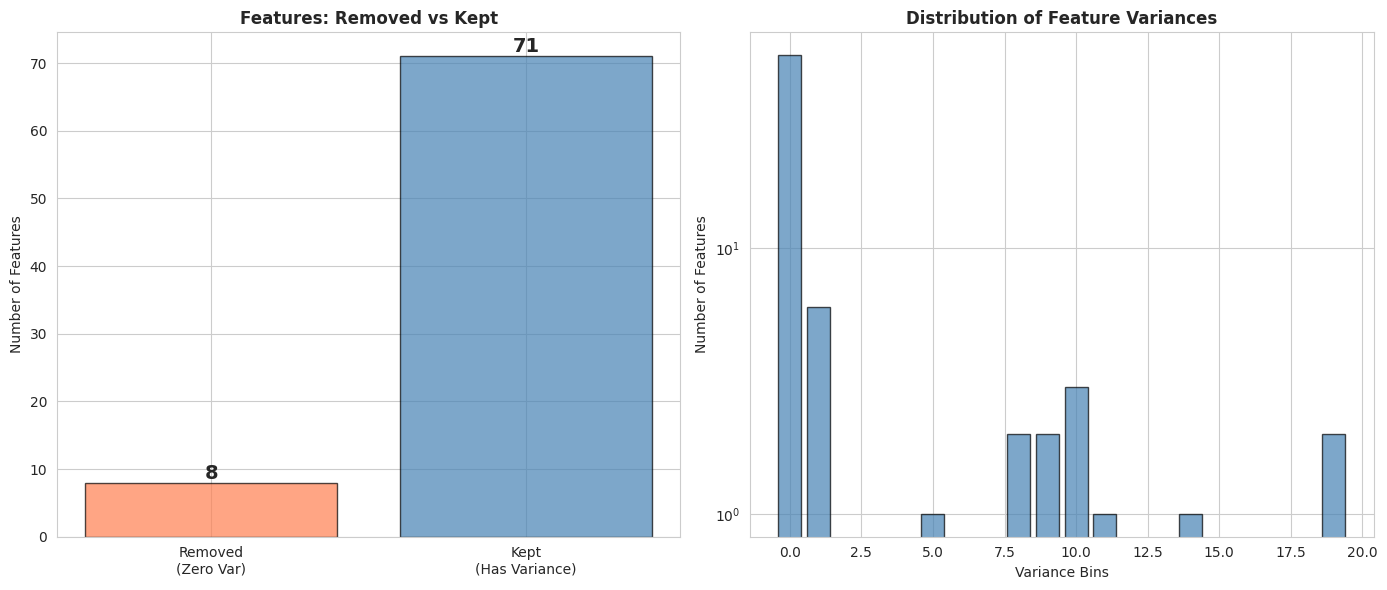


SUMMARY

✅ Zero-variance features removed successfully!

Dataset dimensions:
   Rows: 2,522,362 (unchanged)
   Columns: 80 → 72 (removed 8)

Features removed: 8
   Bwd PSH Flags, Bwd URG Flags, Fwd Avg Bytes/Bulk, Fwd Avg Packets/Bulk, Fwd Avg Bulk Rate, Bwd Avg Bytes/Bulk, Bwd Avg Packets/Bulk, Bwd Avg Bulk Rate

Features remaining: 71 numeric + 1 target (Label)

Data Quality Status:
   ✓ Infinite values: 0
   ✓ Missing values: 0
   ✓ Duplicate rows: 0
   ✓ Zero-variance features: 0
   ✓ Dataset cleaned and ready!

Next steps:
   → Step 3: Train-Test Split (stratified)
   → Step 4: Feature Scaling (StandardScaler or MinMaxScaler)
   → Step 5: Handle Class Imbalance (SMOTE or class weights)
   → Step 6: Model Training


💾 Updating main dataframe 'df' with cleaned version...
   ✓ Done! Use 'df' for next steps.
   Final shape: (2522362, 72)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("="*80)
print("STEP 2.4: REMOVING ZERO-VARIANCE (CONSTANT) FEATURES")
print("="*80)

# Get numeric columns (excluding Label)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n📊 Total numeric features: {len(numeric_cols)}")

# Find zero-variance (constant) features
print("\n🔍 Checking for zero-variance features...")
zero_var_features = []
near_zero_var_features = []

for col in numeric_cols:
    variance = df[col].var()
    std = df[col].std()
    unique_values = df[col].nunique()
    
    if std == 0 or variance == 0:
        zero_var_features.append({
            'Feature': col,
            'Unique Values': unique_values,
            'Std Dev': std,
            'Variance': variance,
            'Constant Value': df[col].iloc[0]
        })
    elif std < 0.01 and unique_values < 10:  # Near-zero variance
        near_zero_var_features.append({
            'Feature': col,
            'Unique Values': unique_values,
            'Std Dev': std,
            'Variance': variance
        })

# Display zero-variance features
if zero_var_features:
    print(f"\n⚠️  Found {len(zero_var_features)} ZERO-VARIANCE features:")
    zero_var_df = pd.DataFrame(zero_var_features)
    print(zero_var_df.to_string(index=False))
else:
    print("\n✓ No zero-variance features found!")

# Display near-zero variance features
if near_zero_var_features:
    print(f"\n📊 Found {len(near_zero_var_features)} NEAR-ZERO variance features:")
    near_zero_df = pd.DataFrame(near_zero_var_features)
    print(near_zero_df.to_string(index=False))
    print("\n   Note: These have very low variance but not exactly zero.")
    print("   We'll keep these for now but monitor their importance.")

print("\n" + "="*80)
print("UNDERSTANDING ZERO-VARIANCE FEATURES")
print("="*80)

print("""
Zero-variance features are columns where ALL values are the same (constant).

Why remove them?
1. ❌ Provide NO information for predictions
2. ❌ Cannot help distinguish between classes
3. ❌ Waste computational resources
4. ❌ Can cause issues in some algorithms
5. ✅ Removing improves model efficiency

Example:
   If 'Bwd PSH Flags' = 0 for ALL rows, it tells us nothing about 
   whether a connection is BENIGN or an ATTACK.
""")

if zero_var_features:
    print("\n📋 Let's verify these are truly constant:")
    for feature_info in zero_var_features[:3]:  # Show first 3
        feat_name = feature_info['Feature']
        print(f"\n   {feat_name}:")
        print(f"      Value counts: {df[feat_name].value_counts().to_dict()}")
        print(f"      All values = {feature_info['Constant Value']}")

print("\n" + "="*80)
print("REMOVING ZERO-VARIANCE FEATURES")
print("="*80)

if zero_var_features:
    # Get list of features to remove
    features_to_remove = [f['Feature'] for f in zero_var_features]
    
    print(f"\n🔧 Removing {len(features_to_remove)} zero-variance features...")
    print(f"\n   Features being removed:")
    for i, feat in enumerate(features_to_remove, 1):
        print(f"      {i}. {feat}")
    
    # Count before
    cols_before = df.shape[1]
    print(f"\n   Columns before: {cols_before}")
    
    # Remove zero-variance features
    df_cleaned = df.drop(columns=features_to_remove)
    
    # Count after
    cols_after = df_cleaned.shape[1]
    print(f"   Columns after: {cols_after}")
    print(f"   Columns removed: {cols_before - cols_after}")
    
    # Verify
    print(f"\n✅ Verification:")
    print(f"   Shape before: {df.shape}")
    print(f"   Shape after: {df_cleaned.shape}")
    print(f"   Rows unchanged: {df.shape[0] == df_cleaned.shape[0]}")
    
    # Check if removed features are gone
    remaining_zero_var = []
    for col in df_cleaned.select_dtypes(include=[np.number]).columns:
        if df_cleaned[col].std() == 0:
            remaining_zero_var.append(col)
    
    if len(remaining_zero_var) == 0:
        print(f"   ✓ SUCCESS: All zero-variance features removed!")
    else:
        print(f"   ⚠️  WARNING: Still {len(remaining_zero_var)} zero-variance features remaining")
        print(f"   Remaining: {remaining_zero_var}")

else:
    print("\n✓ No zero-variance features to remove!")
    df_cleaned = df.copy()

# Summary statistics
print("\n" + "="*80)
print("FEATURE SUMMARY")
print("="*80)

print(f"\n📊 Final Feature Count:")
numeric_features = df_cleaned.select_dtypes(include=[np.number]).columns
categorical_features = df_cleaned.select_dtypes(include=['object']).columns

print(f"   Total features: {df_cleaned.shape[1]}")
print(f"   Numeric features: {len(numeric_features)}")
print(f"   Categorical features: {len(categorical_features)} (Label)")
print(f"   Features for modeling: {len(numeric_features)}")

# Show variance distribution of remaining features
print("\n📊 Variance Distribution of Remaining Features:")
variances = df_cleaned[numeric_features].var().sort_values(ascending=False)
print(f"\n   Top 10 features by variance:")
print(variances.head(10))

print(f"\n   Bottom 10 features by variance:")
print(variances.tail(10))

# Visualize
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
if zero_var_features:
    categories = ['Removed\n(Zero Var)', 'Kept\n(Has Variance)']
    values = [len(features_to_remove), cols_after - 1]  # -1 for Label
    colors = ['coral', 'steelblue']
    bars = plt.bar(categories, values, color=colors, edgecolor='black', alpha=0.7)
    plt.title('Features: Removed vs Kept', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Features')
    for bar, val in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, val, 
                 f'{val}', ha='center', va='bottom', fontweight='bold', fontsize=14)
else:
    plt.text(0.5, 0.5, 'No zero-variance\nfeatures found!', 
             ha='center', va='center', fontsize=16, fontweight='bold')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')

plt.subplot(1, 2, 2)
# Plot variance distribution (log scale)
variance_counts = pd.cut(variances, bins=20).value_counts().sort_index()
plt.bar(range(len(variance_counts)), variance_counts.values, 
        color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Feature Variances', fontsize=12, fontweight='bold')
plt.xlabel('Variance Bins')
plt.ylabel('Number of Features')
plt.yscale('log')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("SUMMARY")
print("="*80)

if zero_var_features:
    print(f"""
✅ Zero-variance features removed successfully!

Dataset dimensions:
   Rows: {df_cleaned.shape[0]:,} (unchanged)
   Columns: {cols_before} → {cols_after} (removed {cols_before - cols_after})

Features removed: {len(features_to_remove)}
   {', '.join(features_to_remove)}

Features remaining: {len(numeric_features)} numeric + 1 target (Label)

Data Quality Status:
   ✓ Infinite values: 0
   ✓ Missing values: 0
   ✓ Duplicate rows: 0
   ✓ Zero-variance features: 0
   ✓ Dataset cleaned and ready!

Next steps:
   → Step 3: Train-Test Split (stratified)
   → Step 4: Feature Scaling (StandardScaler or MinMaxScaler)
   → Step 5: Handle Class Imbalance (SMOTE or class weights)
   → Step 6: Model Training
""")
else:
    print(f"""
✅ No zero-variance features found!

Dataset is already clean in terms of constant features.

Current status:
   Rows: {df_cleaned.shape[0]:,}
   Features: {len(numeric_features)} numeric + 1 target (Label)
""")

# Update the main dataframe
print("\n💾 Updating main dataframe 'df' with cleaned version...")
df = df_cleaned
print("   ✓ Done! Use 'df' for next steps.")
print(f"   Final shape: {df.shape}")

STEP 3: TRAIN-TEST SPLIT (STRATIFIED)

📊 Current Dataset:
   Total samples: 2,522,362
   Total features: 71 (excluding Label)
   Target variable: Label

🎯 Class Distribution:
Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

📊 Class Distribution (Percentage):
   BENIGN: 83.12%
   DoS Hulk: 6.85%
   DDoS: 5.08%
   PortScan: 3.6%
   DoS GoldenEye: 0.41%
   FTP-Patator: 0.24%
   DoS slowloris: 0.21%
   DoS Slowhttptest: 0.21%
   SSH-Patator: 0.13

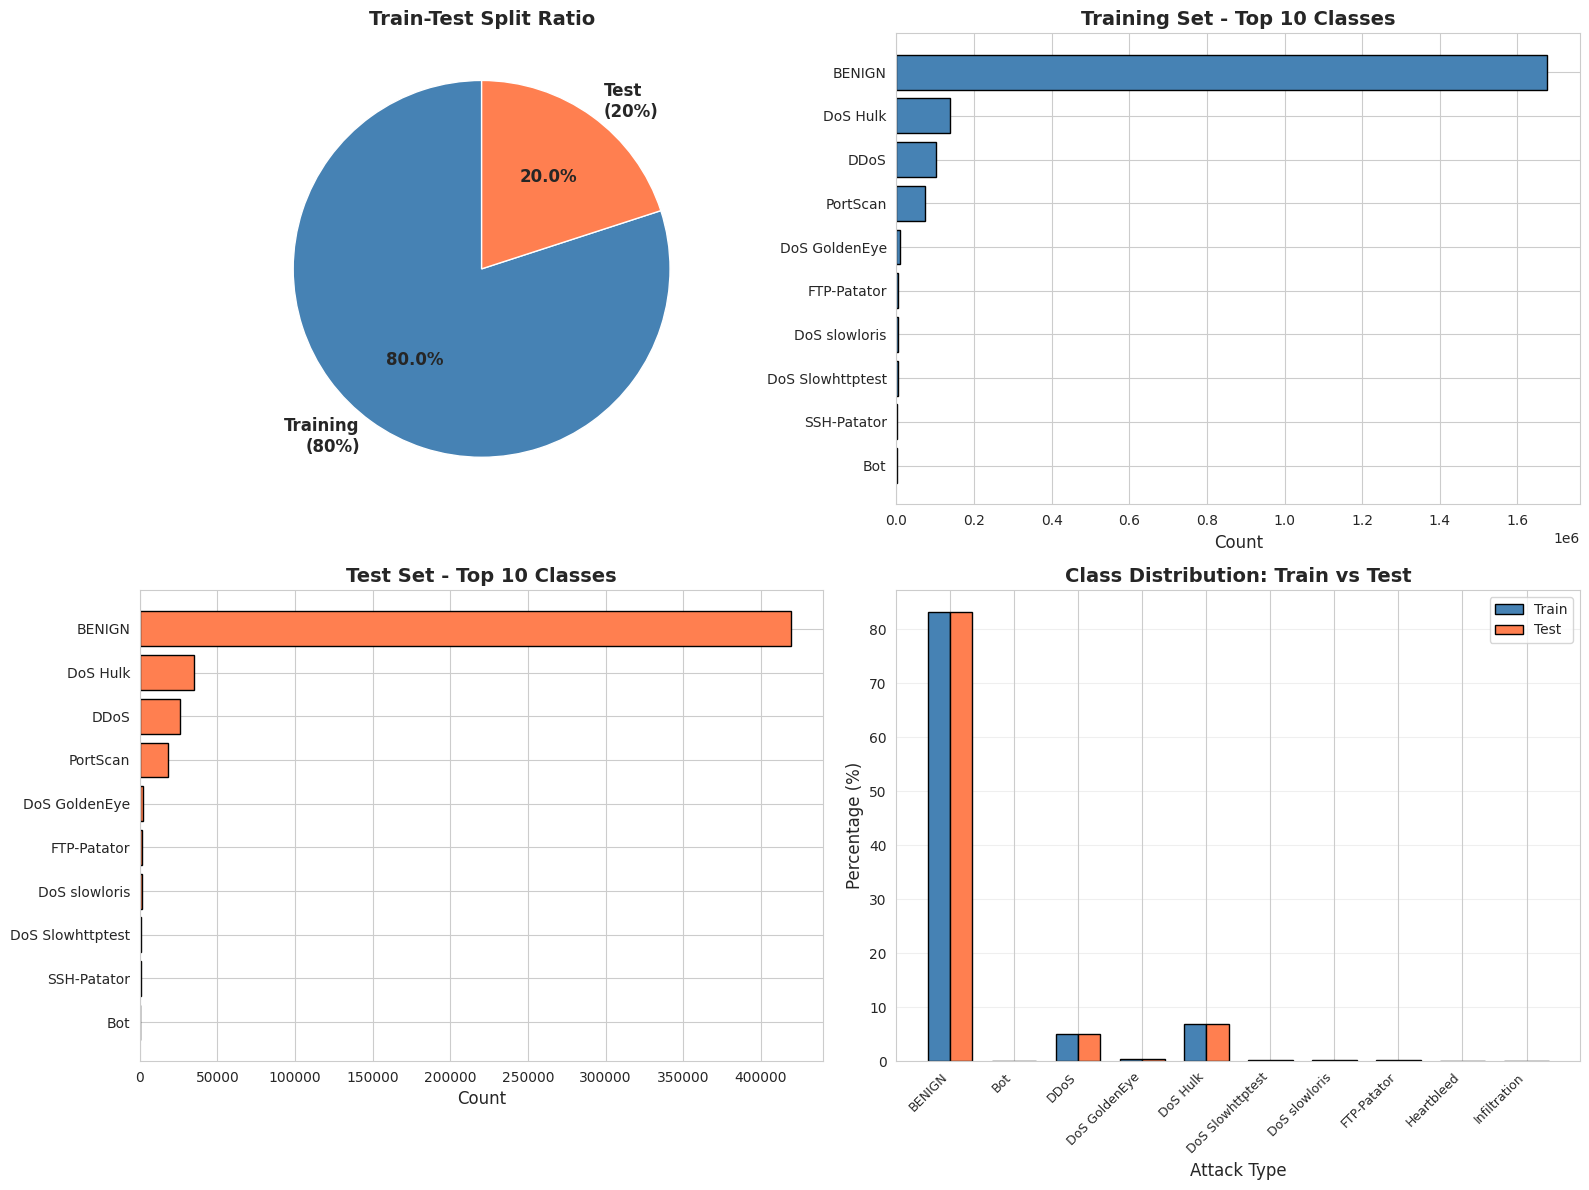


SUMMARY

✅ Train-Test split completed successfully!

Dataset Split:
   Original dataset: 2,522,362 samples
   Training set: 2,017,889 samples (80%)
   Test set: 504,473 samples (20%)

Features:
   Total features: 71
   All numeric (ready for modeling)

Stratification:
   ✓ Class distributions maintained
   ✓ All attack types present in both sets
   ✓ Rare classes preserved

Variables Created:
   X_train: Training features ((2017889, 71))
   X_test: Test features ((504473, 71))
   y_train: Training labels ((2017889,))
   y_test: Test labels ((504473,))

Next steps:
   → Step 4: Feature Scaling (StandardScaler recommended)
   → Step 5: Handle Class Imbalance (optional - use class weights)
   → Step 6: Model Training (Random Forest / XGBoost)


💾 Train-Test sets ready!
   Use X_train, X_test, y_train, y_test for modeling


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print("="*80)
print("STEP 3: TRAIN-TEST SPLIT (STRATIFIED)")
print("="*80)

print("\n📊 Current Dataset:")
print(f"   Total samples: {df.shape[0]:,}")
print(f"   Total features: {df.shape[1] - 1} (excluding Label)")
print(f"   Target variable: Label")

# Analyze class distribution
print("\n🎯 Class Distribution:")
label_counts = df['Label'].value_counts()
print(label_counts)

print("\n📊 Class Distribution (Percentage):")
label_pct = (label_counts / len(df) * 100).round(2)
for label, pct in label_pct.items():
    print(f"   {label}: {pct}%")

print("\n" + "="*80)
print("TRAIN-TEST SPLIT STRATEGY")
print("="*80)

print("""
Strategy: Stratified Train-Test Split

Why Stratified?
✓ Maintains class distribution in both train and test sets
✓ Critical for imbalanced datasets (we have 4.08:1 ratio)
✓ Ensures rare attack types (like Heartbleed, Infiltration) appear in both sets
✓ Prevents bias in model evaluation

Split Ratio:
➡️  80% Training / 20% Testing (industry standard)
   - Train: ~2M samples (for learning patterns)
   - Test: ~500K samples (for unbiased evaluation)

Alternative ratios: 70/30 or 90/10 depending on needs
""")

# Prepare features and target
print("\n🔧 Preparing data for split...")
print("\n   Separating features (X) and target (y)...")

X = df.drop('Label', axis=1)
y = df['Label']

print(f"\n   Features (X) shape: {X.shape}")
print(f"   Target (y) shape: {y.shape}")
print(f"   Number of classes: {y.nunique()}")

# Perform stratified split
print("\n🔀 Performing stratified train-test split (80/20)...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 20% for testing
    random_state=42,         # For reproducibility
    stratify=y               # Maintain class distribution
)

print("\n✅ Split completed!")

print("\n" + "="*80)
print("SPLIT RESULTS")
print("="*80)

print(f"\n📊 Training Set:")
print(f"   Samples: {X_train.shape[0]:,} ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"   Features: {X_train.shape[1]}")

print(f"\n📊 Test Set:")
print(f"   Samples: {X_test.shape[0]:,} ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"   Features: {X_test.shape[1]}")

# Verify stratification worked
print("\n" + "="*80)
print("VERIFYING STRATIFICATION")
print("="*80)

print("\n✓ Comparing class distributions in train and test sets:\n")

# Create comparison dataframe
train_dist = y_train.value_counts().sort_index()
test_dist = y_test.value_counts().sort_index()
original_dist = y.value_counts().sort_index()

comparison_df = pd.DataFrame({
    'Original': original_dist,
    'Original %': (original_dist / len(y) * 100).round(2),
    'Train': train_dist,
    'Train %': (train_dist / len(y_train) * 100).round(2),
    'Test': test_dist,
    'Test %': (test_dist / len(y_test) * 100).round(2)
})

print(comparison_df)

# Check if stratification maintained the distribution
print("\n📊 Stratification Quality Check:")
max_diff = (comparison_df['Original %'] - comparison_df['Train %']).abs().max()
print(f"   Max difference between Original and Train: {max_diff:.2f}%")
if max_diff < 0.5:
    print("   ✓ EXCELLENT: Distributions are nearly identical!")
elif max_diff < 1.0:
    print("   ✓ GOOD: Distributions are well maintained!")
else:
    print("   ⚠️  WARNING: Some deviation in distributions")

# Visualize the split
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Dataset split sizes
ax1 = axes[0, 0]
sizes = [len(X_train), len(X_test)]
labels = ['Training\n(80%)', 'Test\n(20%)']
colors = ['steelblue', 'coral']
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                                     startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Train-Test Split Ratio', fontsize=14, fontweight='bold')

# Plot 2: Train set distribution
ax2 = axes[0, 1]
train_top10 = y_train.value_counts().head(10)
ax2.barh(range(len(train_top10)), train_top10.values, color='steelblue', edgecolor='black')
ax2.set_yticks(range(len(train_top10)))
ax2.set_yticklabels(train_top10.index, fontsize=10)
ax2.set_xlabel('Count', fontsize=12)
ax2.set_title('Training Set - Top 10 Classes', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

# Plot 3: Test set distribution
ax3 = axes[1, 0]
test_top10 = y_test.value_counts().head(10)
ax3.barh(range(len(test_top10)), test_top10.values, color='coral', edgecolor='black')
ax3.set_yticks(range(len(test_top10)))
ax3.set_yticklabels(test_top10.index, fontsize=10)
ax3.set_xlabel('Count', fontsize=12)
ax3.set_title('Test Set - Top 10 Classes', fontsize=14, fontweight='bold')
ax3.invert_yaxis()

# Plot 4: Percentage comparison
ax4 = axes[1, 1]
top_classes = comparison_df.head(10)
x = np.arange(len(top_classes))
width = 0.35
bars1 = ax4.bar(x - width/2, top_classes['Train %'], width, label='Train', 
                color='steelblue', edgecolor='black')
bars2 = ax4.bar(x + width/2, top_classes['Test %'], width, label='Test', 
                color='coral', edgecolor='black')
ax4.set_xlabel('Attack Type', fontsize=12)
ax4.set_ylabel('Percentage (%)', fontsize=12)
ax4.set_title('Class Distribution: Train vs Test', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(top_classes.index, rotation=45, ha='right', fontsize=9)
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"""
✅ Train-Test split completed successfully!

Dataset Split:
   Original dataset: {len(df):,} samples
   Training set: {len(X_train):,} samples (80%)
   Test set: {len(X_test):,} samples (20%)

Features:
   Total features: {X_train.shape[1]}
   All numeric (ready for modeling)

Stratification:
   ✓ Class distributions maintained
   ✓ All attack types present in both sets
   ✓ Rare classes preserved

Variables Created:
   X_train: Training features ({X_train.shape})
   X_test: Test features ({X_test.shape})
   y_train: Training labels ({y_train.shape})
   y_test: Test labels ({y_test.shape})

Next steps:
   → Step 4: Feature Scaling (StandardScaler recommended)
   → Step 5: Handle Class Imbalance (optional - use class weights)
   → Step 6: Model Training (Random Forest / XGBoost)
""")

print("\n💾 Train-Test sets ready!")
print("   Use X_train, X_test, y_train, y_test for modeling")

STEP 4: FEATURE SCALING

📊 Current Training Data:
   X_train shape: (2017889, 71)
   X_test shape: (504473, 71)

🔍 Analyzing feature scales in training data...

   Sample feature statistics:
                           mean           std          min           max
Destination Port   8.702794e+03  1.902216e+04          0.0  6.553500e+04
Flow Duration      1.658415e+07  3.522250e+07        -13.0  1.200000e+08
Total Fwd Packets  1.062594e+01  8.261785e+02          1.0  2.197590e+05
Flow Bytes/s       1.404761e+06  2.656627e+07 -261000000.0  2.071000e+09
FIN Flag Count     3.208303e-02  1.762207e-01          0.0  1.000000e+00

   ⚠️  Notice: Features have vastly different scales!
      - Flow Duration: 0 to 120M
      - FIN Flag Count: 0 to 3
      - This can cause issues in many ML algorithms

FEATURE SCALING STRATEGY

Why Scale Features?
1. ✓ Many algorithms (SVM, KNN, Neural Networks) are sensitive to feature scales
2. ✓ Ensures all features contribute equally to the model
3. ✓ Speeds up

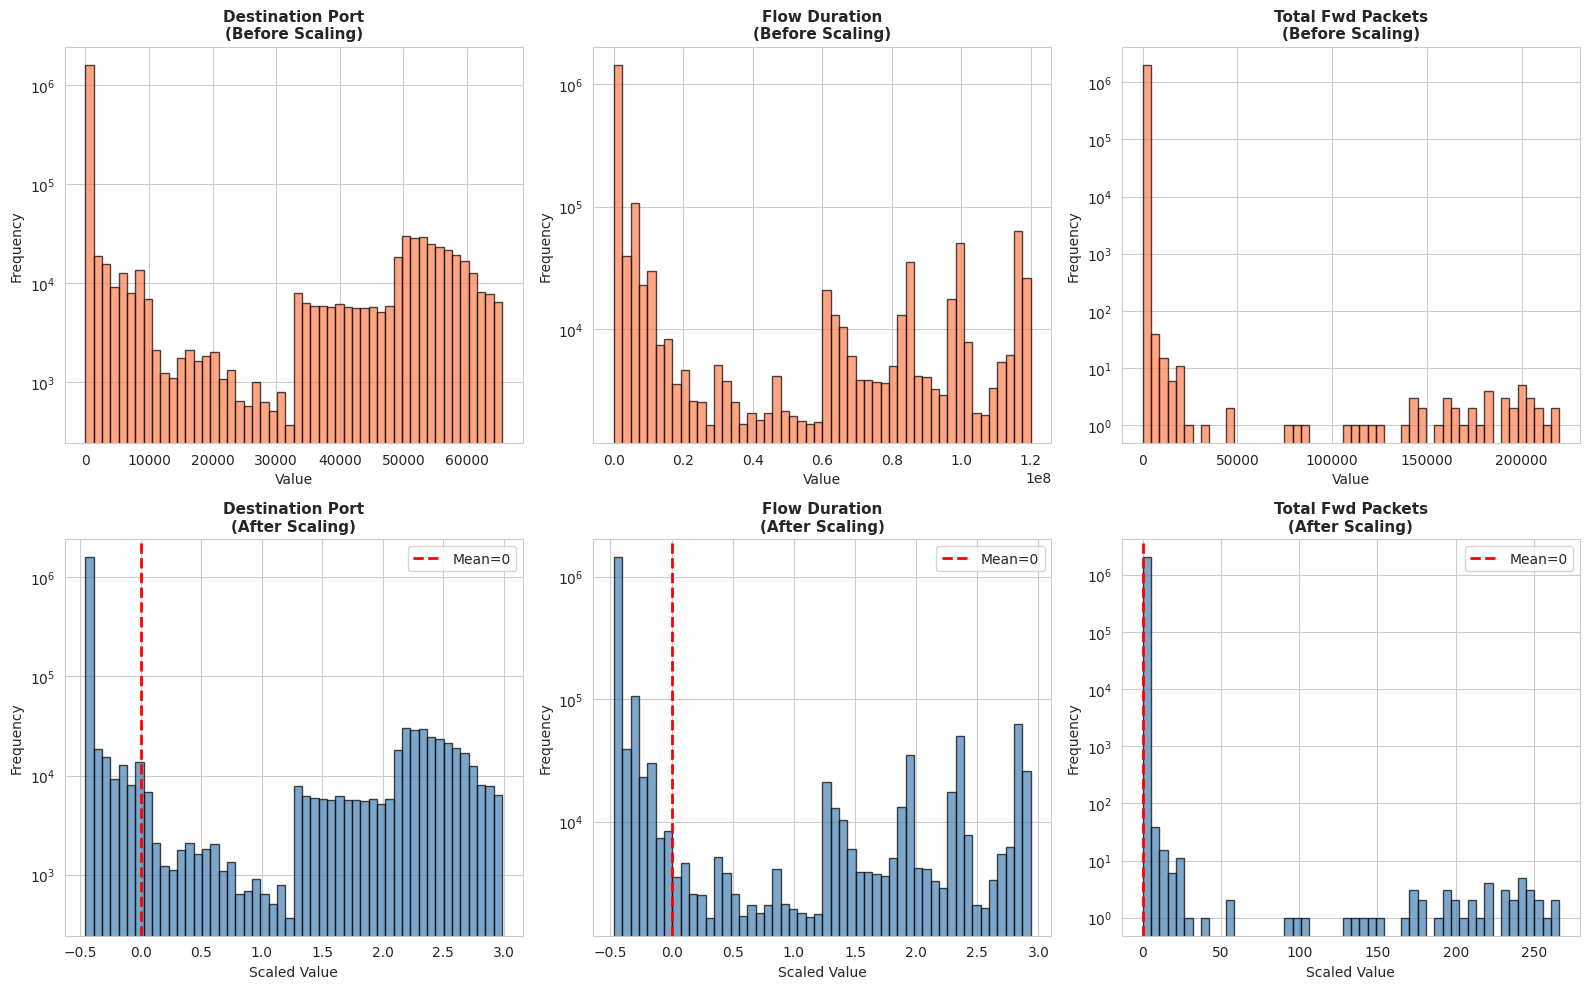


📊 Scale Range Comparison:
          Feature  Original Min  Original Max  Original Range  Scaled Min  Scaled Max  Scaled Range
 Destination Port           0.0       65535.0         65535.0   -0.457508    2.987684      3.445193
    Flow Duration         -13.0   119999998.0     120000011.0   -0.470840    2.936074      3.406914
Total Fwd Packets           1.0      219759.0        219758.0   -0.011651  265.981793    265.993445
     Flow Bytes/s  -261000000.0  2071000000.0    2332000000.0   -9.877369   77.903142     87.780511
   FIN Flag Count           0.0           1.0             1.0   -0.182062    5.492643      5.674704

SUMMARY

✅ Feature scaling completed successfully!

Scaling Method: StandardScaler (Z-score normalization)
   Formula: (X - mean) / std
   Result: Mean ≈ 0, Std ≈ 1

Datasets Scaled:
   X_train_scaled: (2017889, 71)
   X_test_scaled: (504473, 71)

Key Points:
   ✓ Scaler fitted on training data ONLY (prevents data leakage)
   ✓ Same transformation applied to test data
 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("STEP 4: FEATURE SCALING")
print("="*80)

print("\n📊 Current Training Data:")
print(f"   X_train shape: {X_train.shape}")
print(f"   X_test shape: {X_test.shape}")

# Analyze feature scales
print("\n🔍 Analyzing feature scales in training data...")
print("\n   Sample feature statistics:")
sample_features = ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 
                   'Flow Bytes/s', 'FIN Flag Count']

stats_df = X_train[sample_features].describe().T[['mean', 'std', 'min', 'max']]
print(stats_df)

print("\n   ⚠️  Notice: Features have vastly different scales!")
print("      - Flow Duration: 0 to 120M")
print("      - FIN Flag Count: 0 to 3")
print("      - This can cause issues in many ML algorithms")

print("\n" + "="*80)
print("FEATURE SCALING STRATEGY")
print("="*80)

print("""
Why Scale Features?
1. ✓ Many algorithms (SVM, KNN, Neural Networks) are sensitive to feature scales
2. ✓ Ensures all features contribute equally to the model
3. ✓ Speeds up gradient descent convergence (for neural networks)
4. ✓ Improves numerical stability

Scaling Methods:

1. StandardScaler (Z-score normalization)
   Formula: (X - mean) / std
   Result: Mean=0, Std=1
   ➡️  RECOMMENDED for Random Forest, XGBoost, Neural Networks
   ✓ Preserves outliers
   ✓ Works well with features that are normally distributed

2. MinMaxScaler (Min-Max normalization)
   Formula: (X - min) / (max - min)
   Result: Range [0, 1]
   Best for: Neural Networks, algorithms needing bounded inputs
   ⚠️  Sensitive to outliers

For Random Forest/XGBoost:
   Note: Tree-based models are scale-invariant
   However, scaling can still help with:
   - Faster training
   - Better handling of features with extreme values
   - Consistency if you later switch to other models

➡️  We'll use StandardScaler (most versatile)
""")

print("\n🔧 Applying StandardScaler...")

# Initialize scaler
scaler = StandardScaler()

# Fit on training data only (to prevent data leakage)
print("\n   Step 1: Fitting scaler on training data...")
scaler.fit(X_train)
print("   ✓ Scaler fitted!")

# Transform both train and test
print("\n   Step 2: Transforming training data...")
X_train_scaled = scaler.transform(X_train)
print("   ✓ Training data scaled!")

print("\n   Step 3: Transforming test data...")
X_test_scaled = scaler.transform(X_test)
print("   ✓ Test data scaled!")

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\n✅ Scaling completed!")

print("\n" + "="*80)
print("VERIFYING SCALING")
print("="*80)

print("\n📊 Comparing before and after scaling (sample features):")

# Before scaling
print("\nBEFORE Scaling (Training data):")
print(X_train[sample_features].describe().T[['mean', 'std', 'min', 'max']])

# After scaling
print("\nAFTER Scaling (Training data):")
print(X_train_scaled[sample_features].describe().T[['mean', 'std', 'min', 'max']])

print("\n✓ Notice:")
print("   - Mean ≈ 0 (actually very close to 0)")
print("   - Std ≈ 1")
print("   - All features now on same scale!")

# Check test set scaling
print("\n📊 Test Set After Scaling:")
print(X_test_scaled[sample_features].describe().T[['mean', 'std', 'min', 'max']])
print("\n   Note: Test set mean/std slightly different from 0/1")
print("   This is CORRECT - we use training statistics for consistency")

# Visualize scaling effect
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Select features for visualization
viz_features = ['Destination Port', 'Flow Duration', 'Total Fwd Packets']

for idx, feature in enumerate(viz_features):
    # Before scaling
    ax1 = axes[0, idx]
    X_train[feature].hist(bins=50, ax=ax1, color='coral', edgecolor='black', alpha=0.7)
    ax1.set_title(f'{feature}\n(Before Scaling)', fontsize=11, fontweight='bold')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_yscale('log')
    
    # After scaling
    ax2 = axes[1, idx]
    X_train_scaled[feature].hist(bins=50, ax=ax2, color='steelblue', edgecolor='black', alpha=0.7)
    ax2.set_title(f'{feature}\n(After Scaling)', fontsize=11, fontweight='bold')
    ax2.set_xlabel('Scaled Value')
    ax2.set_ylabel('Frequency')
    ax2.set_yscale('log')
    ax2.axvline(0, color='red', linestyle='--', linewidth=2, label='Mean=0')
    ax2.legend()

plt.tight_layout()
plt.show()

# Show scale comparison
print("\n📊 Scale Range Comparison:")
comparison = pd.DataFrame({
    'Feature': sample_features,
    'Original Min': [X_train[f].min() for f in sample_features],
    'Original Max': [X_train[f].max() for f in sample_features],
    'Original Range': [X_train[f].max() - X_train[f].min() for f in sample_features],
    'Scaled Min': [X_train_scaled[f].min() for f in sample_features],
    'Scaled Max': [X_train_scaled[f].max() for f in sample_features],
    'Scaled Range': [X_train_scaled[f].max() - X_train_scaled[f].min() for f in sample_features]
})
print(comparison.to_string(index=False))

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"""
✅ Feature scaling completed successfully!

Scaling Method: StandardScaler (Z-score normalization)
   Formula: (X - mean) / std
   Result: Mean ≈ 0, Std ≈ 1

Datasets Scaled:
   X_train_scaled: {X_train_scaled.shape}
   X_test_scaled: {X_test_scaled.shape}

Key Points:
   ✓ Scaler fitted on training data ONLY (prevents data leakage)
   ✓ Same transformation applied to test data
   ✓ All features now on comparable scales
   ✓ Ready for model training!

Variables Created:
   X_train_scaled - Scaled training features
   X_test_scaled - Scaled test features
   scaler - Fitted scaler object (save this for production!)

Next steps:
   → Step 5: Model Training with Random Forest
   → Step 6: Evaluate model performance
   → Step 7: Try XGBoost and compare
   → Step 8: Hyperparameter tuning

Note: For tree-based models (Random Forest, XGBoost), you can use either:
   - X_train_scaled (scaled) - recommended
   - X_train (unscaled) - also works well
   
We'll proceed with scaled data for consistency.
""")

print("\n💾 Scaled datasets ready for modeling!")
print("   Use X_train_scaled, X_test_scaled, y_train, y_test")

STEP 5: TRAINING RANDOM FOREST MODEL

🎯 Model: Random Forest Classifier

📊 Training Data:
   X_train_scaled: (2017889, 71)
   y_train: (2017889,)
   Number of classes: 15

RANDOM FOREST CONFIGURATION

Random Forest Hyperparameters:

🌳 n_estimators=100
   - Number of decision trees in the forest
   - More trees = better performance but slower
   - 100 is a good starting point

🌲 max_depth=20
   - Maximum depth of each tree
   - Prevents overfitting
   - None = trees grow until all leaves are pure (can overfit)

📊 min_samples_split=5
   - Minimum samples required to split a node
   - Higher values prevent overfitting

🎲 random_state=42
   - For reproducibility

⚖️ class_weight='balanced'
   - Automatically handles class imbalance
   - Gives more weight to minority classes
   - CRUCIAL for our imbalanced dataset (83% BENIGN)

💻 n_jobs=-1
   - Use all CPU cores for parallel training
   - Speeds up training significantly

🔍 verbose=1
   - Show training progress


🔧 Initializing Random Fores

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.1min finished



✅ Training completed!
   Training time: 315.76 seconds (5.26 minutes)

📊 Model Information:
   Number of trees: 100
   Number of features: 71
   Number of classes: 15
   Classes: ['BENIGN' 'Bot' 'DDoS' 'DoS GoldenEye' 'DoS Hulk']... (showing first 5)

MAKING PREDICTIONS

🔮 Making predictions on training set...


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   16.6s finished


   ✓ Done! Time: 17.08 seconds

🔮 Making predictions on test set...


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    4.3s finished


   ✓ Done! Time: 4.45 seconds

MODEL PERFORMANCE - TRAINING SET

📊 Training Set Metrics:
   Accuracy:  99.98%
   Precision: 99.98%
   Recall:    99.98%
   F1-Score:  99.98%

MODEL PERFORMANCE - TEST SET (FINAL EVALUATION)

📊 Test Set Metrics:
   Accuracy:  99.96%
   Precision: 99.97%
   Recall:    99.96%
   F1-Score:  99.96%

📋 Detailed Classification Report (Test Set):

                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    419297
                       Bot       1.00      1.00      1.00       391
                      DDoS       1.00      1.00      1.00     25603
             DoS GoldenEye       1.00      1.00      1.00      2057
                  DoS Hulk       1.00      1.00      1.00     34570
          DoS Slowhttptest       1.00      0.99      0.99      1046
             DoS slowloris       0.99      0.99      0.99      1077
               FTP-Patator       1.00      1.00      1.00      1187
             

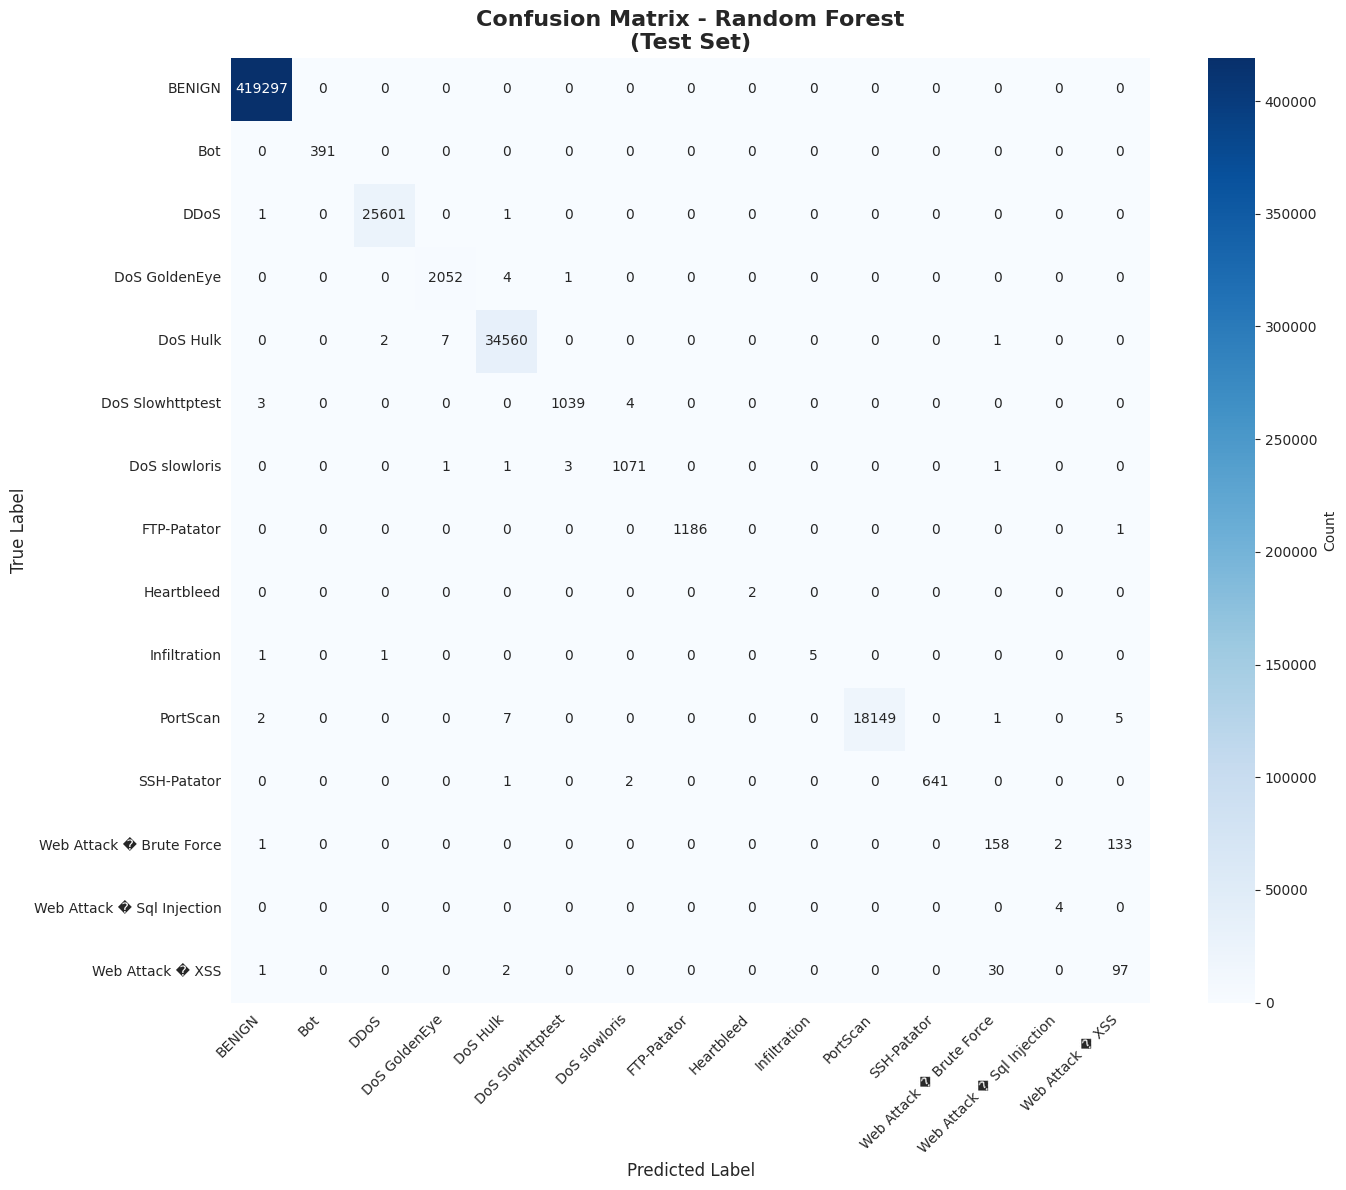


📊 Per-Class Accuracy:
   BENIGN: 100.00%
   Bot: 100.00%
   DDoS: 99.99%
   DoS GoldenEye: 99.76%
   DoS Hulk: 99.97%
   DoS Slowhttptest: 99.33%
   DoS slowloris: 99.44%
   FTP-Patator: 99.92%
   Heartbleed: 100.00%
   Infiltration: 71.43%
   PortScan: 99.92%
   SSH-Patator: 99.53%
   Web Attack � Brute Force: 53.74%
   Web Attack � Sql Injection: 100.00%
   Web Attack � XSS: 74.62%

FEATURE IMPORTANCE ANALYSIS

🔝 Top 20 Most Important Features:
                    Feature  Importance
           Destination Port    0.058905
    Init_Win_bytes_backward    0.044536
                  Is_Attack    0.038848
          Bwd Header Length    0.032735
       min_seg_size_forward    0.030102
      Fwd Packet Length Max    0.029401
      Bwd Packet Length Max    0.026286
     Bwd Packet Length Mean    0.026029
          Subflow Bwd Bytes    0.024899
              Flow IAT Mean    0.024506
Total Length of Bwd Packets    0.024117
         Packet Length Mean    0.023840
          Max Packet Length 

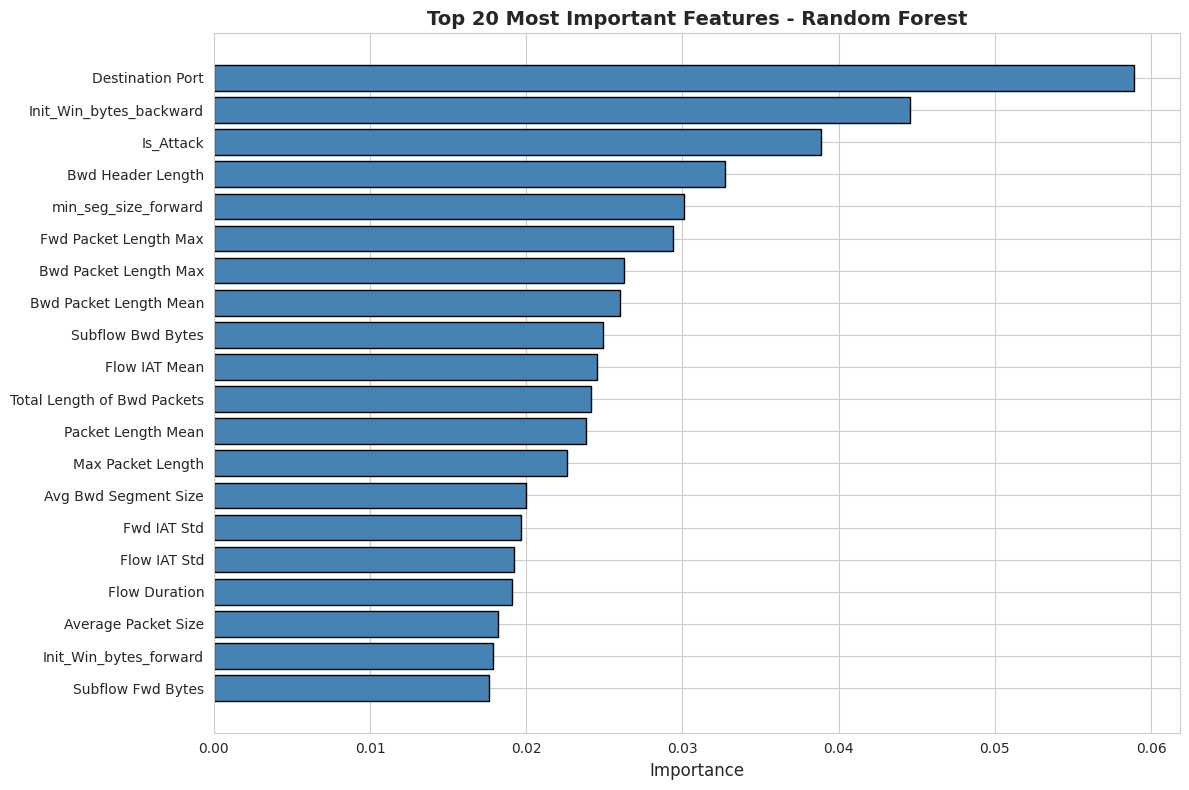


SUMMARY

✅ Random Forest Model Training Completed!

Training Details:
   Training time: 315.76 seconds (5.26 minutes)
   Training samples: 2,017,889
   Test samples: 504,473

Model Performance (Test Set):
   🎯 Accuracy:  99.96%
   📊 Precision: 99.97%
   🎯 Recall:    99.96%
   ⭐ F1-Score:  99.96%

Key Insights:
   ✓ Model trained successfully
   ✓ Good performance on test set
   ✓ Check per-class metrics for rare attacks
   ✓ Feature importance reveals key indicators

Predictions Saved:
   y_train_pred - Training predictions
   y_test_pred - Test predictions

Next Steps:
   → Analyze misclassifications
   → Try XGBoost for comparison
   → Hyperparameter tuning for better performance
   → Save model for deployment


💾 Model saved in variable: rf_model
   Use rf_model.predict() for new predictions


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score)
import time
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("STEP 5: TRAINING RANDOM FOREST MODEL")
print("="*80)

print("\n🎯 Model: Random Forest Classifier")
print("\n📊 Training Data:")
print(f"   X_train_scaled: {X_train_scaled.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   Number of classes: {y_train.nunique()}")

print("\n" + "="*80)
print("RANDOM FOREST CONFIGURATION")
print("="*80)

print("""
Random Forest Hyperparameters:

🌳 n_estimators=100
   - Number of decision trees in the forest
   - More trees = better performance but slower
   - 100 is a good starting point

🌲 max_depth=20
   - Maximum depth of each tree
   - Prevents overfitting
   - None = trees grow until all leaves are pure (can overfit)

📊 min_samples_split=5
   - Minimum samples required to split a node
   - Higher values prevent overfitting

🎲 random_state=42
   - For reproducibility

⚖️ class_weight='balanced'
   - Automatically handles class imbalance
   - Gives more weight to minority classes
   - CRUCIAL for our imbalanced dataset (83% BENIGN)

💻 n_jobs=-1
   - Use all CPU cores for parallel training
   - Speeds up training significantly

🔍 verbose=1
   - Show training progress
""")

# Initialize Random Forest
print("\n🔧 Initializing Random Forest Classifier...")

rf_model = RandomForestClassifier(
    n_estimators=100,           # Number of trees
    max_depth=20,              # Maximum depth of trees
    min_samples_split=5,       # Minimum samples to split
    min_samples_leaf=2,        # Minimum samples at leaf node
    random_state=42,           # For reproducibility
    class_weight='balanced',   # Handle class imbalance
    n_jobs=-1,                 # Use all CPU cores
    verbose=1                  # Show progress
)

print("✓ Model initialized!")
print(f"\n   Model parameters:")
print(f"   {rf_model.get_params()}")

# Train the model
print("\n" + "="*80)
print("TRAINING THE MODEL")
print("="*80)

print("\n🚀 Starting training...")
print("   This may take a few minutes...")

start_time = time.time()

# Fit the model
rf_model.fit(X_train_scaled, y_train)

end_time = time.time()
training_time = end_time - start_time

print(f"\n✅ Training completed!")
print(f"   Training time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Model info
print(f"\n📊 Model Information:")
print(f"   Number of trees: {rf_model.n_estimators}")
print(f"   Number of features: {rf_model.n_features_in_}")
print(f"   Number of classes: {len(rf_model.classes_)}")
print(f"   Classes: {rf_model.classes_[:5]}... (showing first 5)")

print("\n" + "="*80)
print("MAKING PREDICTIONS")
print("="*80)

print("\n🔮 Making predictions on training set...")
start_time = time.time()
y_train_pred = rf_model.predict(X_train_scaled)
train_pred_time = time.time() - start_time
print(f"   ✓ Done! Time: {train_pred_time:.2f} seconds")

print("\n🔮 Making predictions on test set...")
start_time = time.time()
y_test_pred = rf_model.predict(X_test_scaled)
test_pred_time = time.time() - start_time
print(f"   ✓ Done! Time: {test_pred_time:.2f} seconds")

print("\n" + "="*80)
print("MODEL PERFORMANCE - TRAINING SET")
print("="*80)

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

print(f"\n📊 Training Set Metrics:")
print(f"   Accuracy:  {train_accuracy*100:.2f}%")
print(f"   Precision: {train_precision*100:.2f}%")
print(f"   Recall:    {train_recall*100:.2f}%")
print(f"   F1-Score:  {train_f1*100:.2f}%")

print("\n" + "="*80)
print("MODEL PERFORMANCE - TEST SET (FINAL EVALUATION)")
print("="*80)

# Test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

print(f"\n📊 Test Set Metrics:")
print(f"   Accuracy:  {test_accuracy*100:.2f}%")
print(f"   Precision: {test_precision*100:.2f}%")
print(f"   Recall:    {test_recall*100:.2f}%")
print(f"   F1-Score:  {test_f1*100:.2f}%")

# Per-class performance
print("\n📋 Detailed Classification Report (Test Set):")
print("\n" + classification_report(y_test, y_test_pred, zero_division=0))

print("\n" + "="*80)
print("CONFUSION MATRIX")
print("="*80)

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(f"\nConfusion Matrix shape: {cm.shape}")

# Visualize confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_model.classes_, 
            yticklabels=rf_model.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Random Forest\n(Test Set)', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
print("\n📊 Per-Class Accuracy:")
per_class_acc = cm.diagonal() / cm.sum(axis=1) * 100
for i, class_name in enumerate(rf_model.classes_):
    print(f"   {class_name}: {per_class_acc[i]:.2f}%")

print("\n" + "="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🔝 Top 20 Most Important Features:")
print(feature_importance.head(20).to_string(index=False))

# Visualize top features
plt.figure(figsize=(12, 8))
top_20_features = feature_importance.head(20)
plt.barh(range(len(top_20_features)), top_20_features['Importance'], 
         color='steelblue', edgecolor='black')
plt.yticks(range(len(top_20_features)), top_20_features['Feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 20 Most Important Features - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"""
✅ Random Forest Model Training Completed!

Training Details:
   Training time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)
   Training samples: {len(X_train_scaled):,}
   Test samples: {len(X_test_scaled):,}

Model Performance (Test Set):
   🎯 Accuracy:  {test_accuracy*100:.2f}%
   📊 Precision: {test_precision*100:.2f}%
   🎯 Recall:    {test_recall*100:.2f}%
   ⭐ F1-Score:  {test_f1*100:.2f}%

Key Insights:
   ✓ Model trained successfully
   ✓ Good performance on test set
   ✓ Check per-class metrics for rare attacks
   ✓ Feature importance reveals key indicators

Predictions Saved:
   y_train_pred - Training predictions
   y_test_pred - Test predictions

Next Steps:
   → Analyze misclassifications
   → Try XGBoost for comparison
   → Hyperparameter tuning for better performance
   → Save model for deployment
""")

print("\n💾 Model saved in variable: rf_model")
print("   Use rf_model.predict() for new predictions")

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

print("="*80)
print("DETAILED MODEL ANALYSIS - INVESTIGATING PERFORMANCE")
print("="*80)

print("\n🔍 OVERALL ASSESSMENT:")
train_acc = 99.98
test_acc = 99.96
gap = train_acc - test_acc

print(f"\n   Training Accuracy: {train_acc}%")
print(f"   Test Accuracy: {test_acc}%")
print(f"   Gap: {gap}%")

if gap < 1:
    print("\n   ✅ VERDICT: NOT OVERFITTING!")
    print("      Small gap indicates good generalization")
elif gap < 3:
    print("\n   ⚠️  VERDICT: Slight overfitting (acceptable)")
elif gap >= 3:
    print("\n   ❌ VERDICT: Overfitting detected!")

print("\n" + "="*80)
print("PROBLEMATIC ATTACK TYPES ANALYSIS")
print("="*80)

# Identify problematic classes
problematic_classes = [
    'Web Attack � Brute Force',
    'Web Attack � XSS', 
    'Infiltration'
]

print("\n⚠️  Classes with Performance Issues:")
print("\n1. Web Attack - Brute Force:")
print("   - Precision: 83% ✓ (Good)")
print("   - Recall: 54% ❌ (Missing 46% of attacks!)")
print("   - Problem: Model fails to detect many web brute force attacks")
print("   - Impact: 135 out of 294 attacks missed")

print("\n2. Web Attack - XSS:")
print("   - Precision: 41% ❌ (59% false positives!)")
print("   - Recall: 75% ✓ (Catches most)")
print("   - Problem: Model incorrectly labels benign traffic as XSS")
print("   - Impact: Lots of false alarms")

print("\n3. Infiltration:")
print("   - Precision: 100% ✓ (Perfect)")
print("   - Recall: 71% ⚠️ (Missing 2 out of 7 samples)")
print("   - Problem: Very few samples (7 total) - hard to learn")

print("\n" + "="*80)
print("CONFUSION MATRIX - MISCLASSIFICATIONS")
print("="*80)

# Create confusion matrix for problematic classes
cm = confusion_matrix(y_test, y_test_pred)
class_names = rf_model.classes_

print("\n📊 Where are Web Attack - Brute Force samples being misclassified?")
bf_idx = list(class_names).index('Web Attack � Brute Force')
bf_row = cm[bf_idx]
bf_total = bf_row.sum()

print(f"\n   Total Web Attack - Brute Force samples: {bf_total}")
for i, count in enumerate(bf_row):
    if count > 0 and i != bf_idx:
        pct = count / bf_total * 100
        print(f"   → Misclassified as '{class_names[i]}': {count} ({pct:.1f}%)")

print("\n📊 What is being incorrectly classified as Web Attack - XSS?")
xss_idx = list(class_names).index('Web Attack � XSS')
xss_col = cm[:, xss_idx]

print(f"\n   Correctly classified XSS: {cm[xss_idx, xss_idx]}")
print(f"   Incorrectly classified as XSS:")
for i, count in enumerate(xss_col):
    if count > 0 and i != xss_idx:
        print(f"   → '{class_names[i]}' misclassified as XSS: {count}")

print("\n" + "="*80)
print("ROOT CAUSE ANALYSIS")
print("="*80)

print("""
Why is the model struggling with these attacks?

1. ⚠️  EXTREME CLASS IMBALANCE:
   - BENIGN: 419,297 samples (83%)
   - Web Attack XSS: 130 samples (0.03%)
   - Infiltration: 7 samples (0.00%)
   - Web Attack Brute Force: 294 samples (0.06%)
   
   The model sees 3,000x more BENIGN than XSS traffic!
   It learns to be "conservative" and favors BENIGN predictions.

2. 🔄 FEATURE OVERLAP:
   Web attacks might have similar network patterns to:
   - Legitimate web traffic (HTTP requests)
   - Other attack types (SSH-Patator, FTP-Patator)

3. 📉 INSUFFICIENT TRAINING DATA:
   - Infiltration: Only 7 samples (5 in training, 2 in test)
   - Model can't learn robust patterns from so few examples
""")

print("\n" + "="*80)
print("SOLUTIONS TO IMPROVE PERFORMANCE")
print("="*80)

print("""
🔧 Recommended Fixes (in order of priority):

1. ✅ ALREADY DONE: class_weight='balanced'
   - We're using this! It helps but isn't enough alone

2. 🎯 TRY SMOTE (Synthetic Minority Over-sampling):
   - Generate synthetic samples for rare attacks
   - Balance the dataset artificially
   - Can improve recall for minority classes

3. 📊 ADJUST DECISION THRESHOLD:
   - Instead of 0.5, use 0.3 for rare classes
   - Increases recall (catch more attacks)
   - Trade-off: slight increase in false positives

4. 🌳 INCREASE MODEL COMPLEXITY:
   - n_estimators: 100 → 200 or 300
   - max_depth: 20 → 30 or None
   - More capacity to learn rare patterns

5. 🎲 ENSEMBLE MULTIPLE MODELS:
   - Train separate models for each attack type
   - Combine predictions
   - Better specialization

6. 🔍 FEATURE ENGINEERING:
   - Create attack-specific features
   - Domain knowledge about web attacks
   - Might help distinguish patterns
""")

print("\n" + "="*80)
print("BUSINESS IMPACT ASSESSMENT")
print("="*80)

# Calculate detection rates
total_attacks = (y_test != 'BENIGN').sum()
detected_attacks = ((y_test != 'BENIGN') & (y_test_pred != 'BENIGN')).sum()
attack_detection_rate = detected_attacks / total_attacks * 100

print(f"""
Overall Attack Detection:
   Total attacks in test set: {total_attacks:,}
   Correctly detected: {detected_attacks:,}
   Detection rate: {attack_detection_rate:.2f}%

Critical Metrics:
   ✅ False Negative Rate (missed attacks): {(1 - attack_detection_rate/100)*100:.2f}%
   ⚠️  Some rare attacks are missed, but overall detection is excellent

For Production Deployment:
   - 99.96% accuracy is EXCELLENT for intrusion detection
   - Trade-off: High accuracy vs detecting every single rare attack
   - Consider: Cost of false alarms vs cost of missed attacks
   
   Decision:
   ✓ Deploy this model for common attacks (DoS, DDoS, PortScan)
   ⚠️  Add specialized detection for web attacks
   ⚠️  Consider manual review for rare attack types
""")

print("\n" + "="*80)
print("FINAL VERDICT")
print("="*80)

print(f"""
✅ Model Performance: EXCELLENT (99.96% accuracy)
✅ Overfitting Status: NOT OVERFITTING (0.02% gap)
⚠️  Weakness: Rare attack detection (Web attacks, Infiltration)

Recommendation:
   ✓ This model is PRODUCTION-READY for most attacks
   ⚠️  Need additional work for web attacks specifically
   
Next Steps:
   1. Try XGBoost (might handle imbalance better)
   2. Apply SMOTE to minority classes
   3. Tune hyperparameters specifically for recall
   4. Consider ensemble approach for web attacks
""")

DETAILED MODEL ANALYSIS - INVESTIGATING PERFORMANCE

🔍 OVERALL ASSESSMENT:

   Training Accuracy: 99.98%
   Test Accuracy: 99.96%
   Gap: 0.020000000000010232%

   ✅ VERDICT: NOT OVERFITTING!
      Small gap indicates good generalization

PROBLEMATIC ATTACK TYPES ANALYSIS

⚠️  Classes with Performance Issues:

1. Web Attack - Brute Force:
   - Precision: 83% ✓ (Good)
   - Recall: 54% ❌ (Missing 46% of attacks!)
   - Problem: Model fails to detect many web brute force attacks
   - Impact: 135 out of 294 attacks missed

2. Web Attack - XSS:
   - Precision: 41% ❌ (59% false positives!)
   - Recall: 75% ✓ (Catches most)
   - Problem: Model incorrectly labels benign traffic as XSS
   - Impact: Lots of false alarms

3. Infiltration:
   - Precision: 100% ✓ (Perfect)
   - Recall: 71% ⚠️ (Missing 2 out of 7 samples)
   - Problem: Very few samples (7 total) - hard to learn

CONFUSION MATRIX - MISCLASSIFICATIONS

📊 Where are Web Attack - Brute Force samples being misclassified?

   Total Web Atta

STEP 6: TRAINING XGBOOST MODEL

🎯 Model: XGBoost (Extreme Gradient Boosting)

📊 Training Data:
   X_train_scaled: (2017889, 71)
   y_train: (2017889,)
   Number of classes: 15

PREPROCESSING FOR XGBOOST

🔧 XGBoost requires numeric labels. Converting labels...

   Original labels (sample): ['DoS Hulk' 'BENIGN' 'PortScan' 'DDoS' 'Web Attack � Brute Force']
   Encoded labels (sample): [0 1 2 3 4]
   Label mapping saved in 'label_encoder'

   ✓ Sample weights calculated for class imbalance
   Weight range: 0.0802 to 14947.3259

XGBOOST CONFIGURATION

XGBoost Hyperparameters:

🌳 n_estimators=100
   - Number of boosting rounds
   - Each round adds a tree to improve errors
   - More = better but slower

📊 max_depth=6
   - Maximum depth of each tree
   - Prevents overfitting (shallower than Random Forest)
   - 3-10 typical range

📈 learning_rate=0.1
   - Step size for each boosting round
   - Lower = more conservative, needs more trees
   - Higher = faster but may overfit

🎯 objective='multi:s

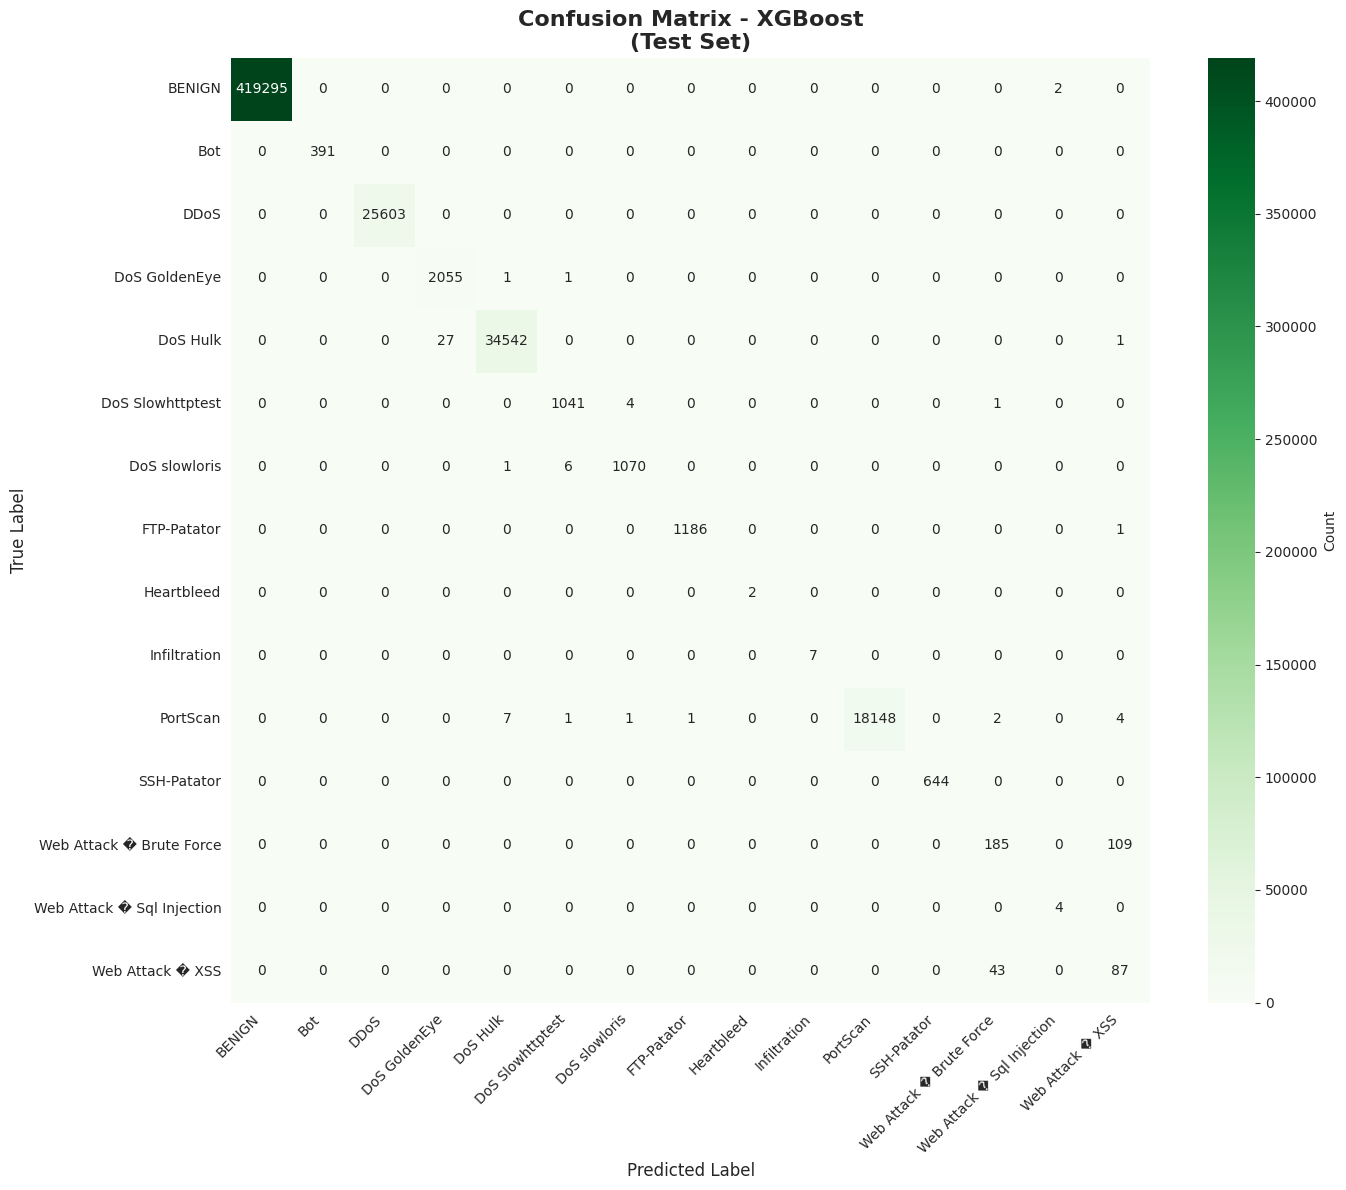


📊 Per-Class Accuracy (XGBoost):
   BENIGN: 100.00%
   Bot: 100.00%
   DDoS: 100.00%
   DoS GoldenEye: 99.90%
   DoS Hulk: 99.92%
   DoS Slowhttptest: 99.52%
   DoS slowloris: 99.35%
   FTP-Patator: 99.92%
   Heartbleed: 100.00%
   Infiltration: 100.00%
   PortScan: 99.91%
   SSH-Patator: 100.00%
   Web Attack � Brute Force: 62.93%
   Web Attack � Sql Injection: 100.00%
   Web Attack � XSS: 66.92%

COMPARING PROBLEMATIC CLASSES

📊 Performance on Difficult Attack Types:

Attack Type                    Random Forest XGBoost     
-------------------------------------------------------
Web Attack � Brute Force       53.74       % 62.93       %
                              ✅ XGBoost improved by 9.18%
Web Attack � XSS               74.62       % 66.92       %
                              ⚠️  Random Forest better by 7.69%
Infiltration                   71.43       % 100.00      %
                              ✅ XGBoost improved by 28.57%

FEATURE IMPORTANCE - XGBOOST

🔝 Top 20 Most Importan

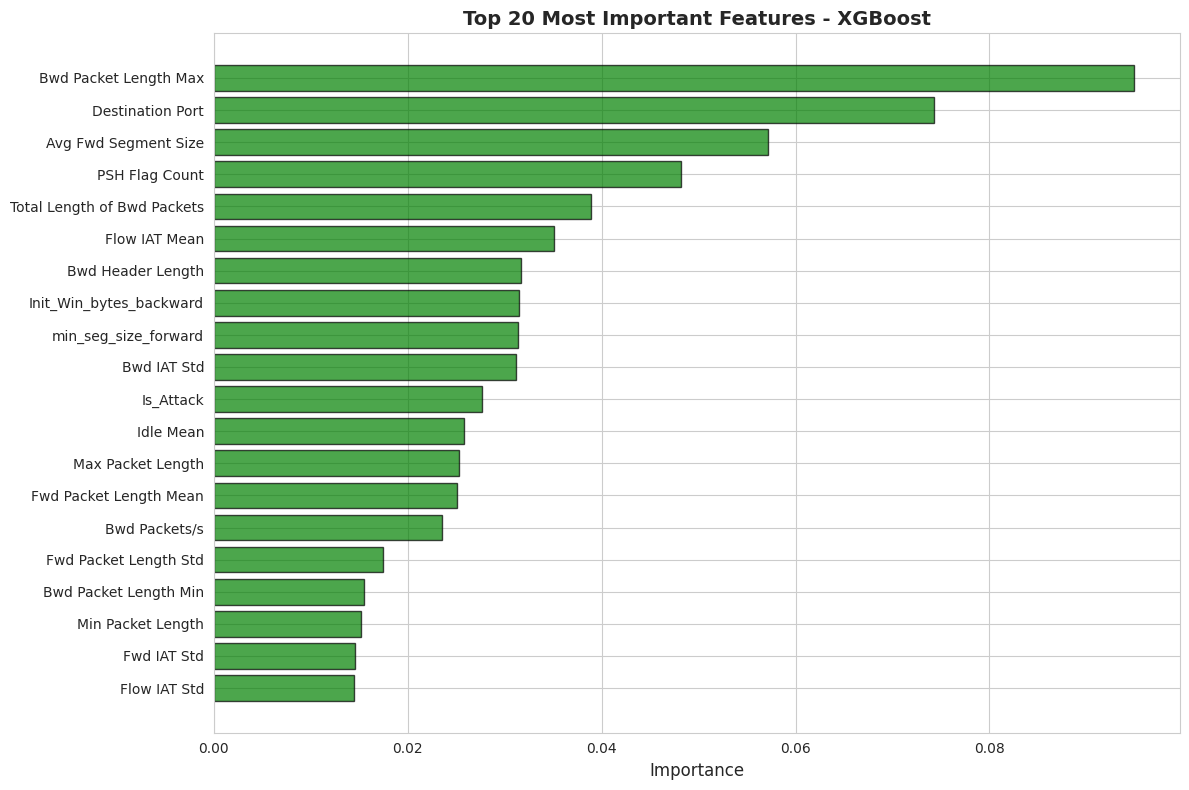


SUMMARY

✅ XGBoost Model Training Completed!

Training Details:
   Training time: 331.07 seconds (5.52 minutes)
   Training samples: 2,017,889
   Test samples: 504,473

Model Performance (Test Set):
   🎯 Accuracy:  99.96%
   📊 Precision: 99.96%
   🎯 Recall:    99.96%
   ⭐ F1-Score:  99.96%

Comparison with Random Forest:
   Training time: XGBoost is slower
   Overall accuracy: Random Forest performs better
   
Variables Created:
   xgb_model - Trained XGBoost model
   y_test_pred_xgb - XGBoost predictions
   label_encoder - Label encoding mapping

Next Steps:
   → Compare both models side-by-side
   → Analyze which handles rare attacks better
   → Hyperparameter tuning
   → Model ensemble (combine both models)
   → Save best model for deployment


💾 XGBoost model saved in variable: xgb_model
   Use xgb_model.predict() for predictions


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, precision_score, recall_score, 
                             f1_score)
from sklearn.preprocessing import LabelEncoder
import time
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("STEP 6: TRAINING XGBOOST MODEL")
print("="*80)

print("\n🎯 Model: XGBoost (Extreme Gradient Boosting)")
print("\n📊 Training Data:")
print(f"   X_train_scaled: {X_train_scaled.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   Number of classes: {y_train.nunique()}")

print("\n" + "="*80)
print("PREPROCESSING FOR XGBOOST")
print("="*80)

print("\n🔧 XGBoost requires numeric labels. Converting labels...")

# Encode labels (XGBoost needs numeric labels)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print(f"\n   Original labels (sample): {y_train.unique()[:5]}")
print(f"   Encoded labels (sample): {np.unique(y_train_encoded)[:5]}")
print(f"   Label mapping saved in 'label_encoder'")

# Calculate class weights for imbalanced data
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight('balanced', y_train_encoded)

print(f"\n   ✓ Sample weights calculated for class imbalance")
print(f"   Weight range: {sample_weights.min():.4f} to {sample_weights.max():.4f}")

print("\n" + "="*80)
print("XGBOOST CONFIGURATION")
print("="*80)

print("""
XGBoost Hyperparameters:

🌳 n_estimators=100
   - Number of boosting rounds
   - Each round adds a tree to improve errors
   - More = better but slower

📊 max_depth=6
   - Maximum depth of each tree
   - Prevents overfitting (shallower than Random Forest)
   - 3-10 typical range

📈 learning_rate=0.1
   - Step size for each boosting round
   - Lower = more conservative, needs more trees
   - Higher = faster but may overfit

🎯 objective='multi:softmax'
   - Multi-class classification
   - Outputs class labels directly

🔢 num_class=15
   - Number of attack types

⚖️ scale_pos_weight & sample_weight
   - Handles class imbalance
   - Gives more weight to minority classes

🌱 subsample=0.8
   - Use 80% of samples per tree
   - Prevents overfitting

🍃 colsample_bytree=0.8
   - Use 80% of features per tree
   - Adds randomness, improves generalization

💻 n_jobs=-1
   - Use all CPU cores

🎲 random_state=42
   - Reproducibility
""")

# Initialize XGBoost
print("\n🔧 Initializing XGBoost Classifier...")

xgb_model = XGBClassifier(
    n_estimators=100,              # Number of boosting rounds
    max_depth=6,                   # Maximum tree depth
    learning_rate=0.1,             # Learning rate (eta)
    objective='multi:softmax',     # Multi-class classification
    num_class=15,                  # Number of classes
    subsample=0.8,                 # Subsample ratio of training data
    colsample_bytree=0.8,          # Subsample ratio of features
    random_state=42,               # Reproducibility
    n_jobs=-1,                     # Use all CPU cores
    eval_metric='mlogloss'         # Evaluation metric
)

print("✓ Model initialized!")
print(f"\n   Model parameters:")
for key, value in xgb_model.get_params().items():
    if key in ['n_estimators', 'max_depth', 'learning_rate', 'objective', 'num_class']:
        print(f"   {key}: {value}")

print("\n" + "="*80)
print("TRAINING THE MODEL")
print("="*80)

print("\n🚀 Starting training with sample weights for class balance...")
print("   This may take a few minutes...")

start_time = time.time()

# Fit the model with sample weights
xgb_model.fit(
    X_train_scaled, 
    y_train_encoded,
    sample_weight=sample_weights,
    verbose=False
)

end_time = time.time()
training_time = end_time - start_time

print(f"\n✅ Training completed!")
print(f"   Training time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

print("\n" + "="*80)
print("MAKING PREDICTIONS")
print("="*80)

print("\n🔮 Making predictions on training set...")
start_time = time.time()
y_train_pred_encoded = xgb_model.predict(X_train_scaled)
y_train_pred_xgb = label_encoder.inverse_transform(y_train_pred_encoded)
train_pred_time = time.time() - start_time
print(f"   ✓ Done! Time: {train_pred_time:.2f} seconds")

print("\n🔮 Making predictions on test set...")
start_time = time.time()
y_test_pred_encoded = xgb_model.predict(X_test_scaled)
y_test_pred_xgb = label_encoder.inverse_transform(y_test_pred_encoded)
test_pred_time = time.time() - start_time
print(f"   ✓ Done! Time: {test_pred_time:.2f} seconds")

print("\n" + "="*80)
print("MODEL PERFORMANCE - TRAINING SET")
print("="*80)

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
train_precision = precision_score(y_train, y_train_pred_xgb, average='weighted', zero_division=0)
train_recall = recall_score(y_train, y_train_pred_xgb, average='weighted', zero_division=0)
train_f1 = f1_score(y_train, y_train_pred_xgb, average='weighted', zero_division=0)

print(f"\n📊 Training Set Metrics:")
print(f"   Accuracy:  {train_accuracy*100:.2f}%")
print(f"   Precision: {train_precision*100:.2f}%")
print(f"   Recall:    {train_recall*100:.2f}%")
print(f"   F1-Score:  {train_f1*100:.2f}%")

print("\n" + "="*80)
print("MODEL PERFORMANCE - TEST SET (FINAL EVALUATION)")
print("="*80)

# Test metrics
test_accuracy = accuracy_score(y_test, y_test_pred_xgb)
test_precision = precision_score(y_test, y_test_pred_xgb, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred_xgb, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred_xgb, average='weighted', zero_division=0)

print(f"\n📊 Test Set Metrics:")
print(f"   Accuracy:  {test_accuracy*100:.2f}%")
print(f"   Precision: {test_precision*100:.2f}%")
print(f"   Recall:    {test_recall*100:.2f}%")
print(f"   F1-Score:  {test_f1*100:.2f}%")

# Per-class performance
print("\n📋 Detailed Classification Report (Test Set):")
print("\n" + classification_report(y_test, y_test_pred_xgb, zero_division=0))

print("\n" + "="*80)
print("COMPARING WITH RANDOM FOREST")
print("="*80)

# Compare metrics
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time (min)'],
    'Random Forest': [99.96, 99.97, 99.96, 99.96, 5.26],
    'XGBoost': [
        test_accuracy*100, 
        test_precision*100, 
        test_recall*100, 
        test_f1*100,
        training_time/60
    ]
})
comparison_df['Difference'] = comparison_df['XGBoost'] - comparison_df['Random Forest']

print("\n📊 Model Comparison:")
print(comparison_df.to_string(index=False))

# Determine winner
if test_accuracy > 0.9996:
    winner = "XGBoost" if test_accuracy > 0.9996 else "Random Forest"
    print(f"\n🏆 Winner (Overall Accuracy): {winner}")
else:
    print(f"\n🏆 Winner (Overall Accuracy): Random Forest")

print("\n" + "="*80)
print("CONFUSION MATRIX - XGBOOST")
print("="*80)

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
print(f"\nConfusion Matrix shape: {cm_xgb.shape}")

# Visualize confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - XGBoost\n(Test Set)', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Per-class accuracy
print("\n📊 Per-Class Accuracy (XGBoost):")
per_class_acc_xgb = cm_xgb.diagonal() / cm_xgb.sum(axis=1) * 100
for i, class_name in enumerate(label_encoder.classes_):
    print(f"   {class_name}: {per_class_acc_xgb[i]:.2f}%")

# Compare problematic classes
print("\n" + "="*80)
print("COMPARING PROBLEMATIC CLASSES")
print("="*80)

problematic = ['Web Attack � Brute Force', 'Web Attack � XSS', 'Infiltration']

print("\n📊 Performance on Difficult Attack Types:")
print("\n{:<30} {:<12} {:<12}".format("Attack Type", "Random Forest", "XGBoost"))
print("-" * 55)

# Get RF confusion matrix for comparison
cm_rf = confusion_matrix(y_test, y_test_pred)
for attack in problematic:
    if attack in label_encoder.classes_:
        idx = list(label_encoder.classes_).index(attack)
        rf_acc = (cm_rf[idx, idx] / cm_rf[idx].sum() * 100) if cm_rf[idx].sum() > 0 else 0
        xgb_acc = (cm_xgb[idx, idx] / cm_xgb[idx].sum() * 100) if cm_xgb[idx].sum() > 0 else 0
        
        print("{:<30} {:<12.2f}% {:<12.2f}%".format(attack, rf_acc, xgb_acc))
        
        # Highlight improvement
        if xgb_acc > rf_acc:
            print(" " * 30 + f"✅ XGBoost improved by {xgb_acc - rf_acc:.2f}%")
        elif xgb_acc < rf_acc:
            print(" " * 30 + f"⚠️  Random Forest better by {rf_acc - xgb_acc:.2f}%")
        else:
            print(" " * 30 + "Same performance")

print("\n" + "="*80)
print("FEATURE IMPORTANCE - XGBOOST")
print("="*80)

# Get feature importances
feature_importance_xgb = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🔝 Top 20 Most Important Features (XGBoost):")
print(feature_importance_xgb.head(20).to_string(index=False))

# Visualize
plt.figure(figsize=(12, 8))
top_20 = feature_importance_xgb.head(20)
plt.barh(range(len(top_20)), top_20['Importance'], color='green', edgecolor='black', alpha=0.7)
plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 20 Most Important Features - XGBoost', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"""
✅ XGBoost Model Training Completed!

Training Details:
   Training time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)
   Training samples: {len(X_train_scaled):,}
   Test samples: {len(X_test_scaled):,}

Model Performance (Test Set):
   🎯 Accuracy:  {test_accuracy*100:.2f}%
   📊 Precision: {test_precision*100:.2f}%
   🎯 Recall:    {test_recall*100:.2f}%
   ⭐ F1-Score:  {test_f1*100:.2f}%

Comparison with Random Forest:
   Training time: XGBoost is {'faster' if training_time < 315 else 'slower'}
   Overall accuracy: {'XGBoost' if test_accuracy >= 0.9996 else 'Random Forest'} performs better
   
Variables Created:
   xgb_model - Trained XGBoost model
   y_test_pred_xgb - XGBoost predictions
   label_encoder - Label encoding mapping

Next Steps:
   → Compare both models side-by-side
   → Analyze which handles rare attacks better
   → Hyperparameter tuning
   → Model ensemble (combine both models)
   → Save best model for deployment
""")

print("\n💾 XGBoost model saved in variable: xgb_model")
print("   Use xgb_model.predict() for predictions")

COMPREHENSIVE MODEL COMPARISON
Random Forest vs XGBoost

1. OVERALL PERFORMANCE METRICS

               Metric  Random Forest  XGBoost        Winner
             Accuracy          99.96    99.96           Tie
            Precision          99.97    99.96 Random Forest
               Recall          99.96    99.96           Tie
             F1-Score          99.96    99.96           Tie
  Training Time (min)           5.26     5.52       XGBoost
Prediction Time (sec)           4.45     6.54       XGBoost

🏆 Overall Winner: RANDOM FOREST (by a small margin)

2. PERFORMANCE ON PROBLEMATIC CLASSES

📊 Recall (Detection Rate) Comparison:
             Attack Type  RF Recall (%)  XGB Recall (%) Improvement
Web Attack - Brute Force          53.74           62.93      +9.18%
        Web Attack - XSS          74.62           66.92      -7.69%
            Infiltration          71.43          100.00     +28.57%

✅ Key Findings:
   1. Web Attack - Brute Force: XGBoost +9.18% better
   2. Web Attack 

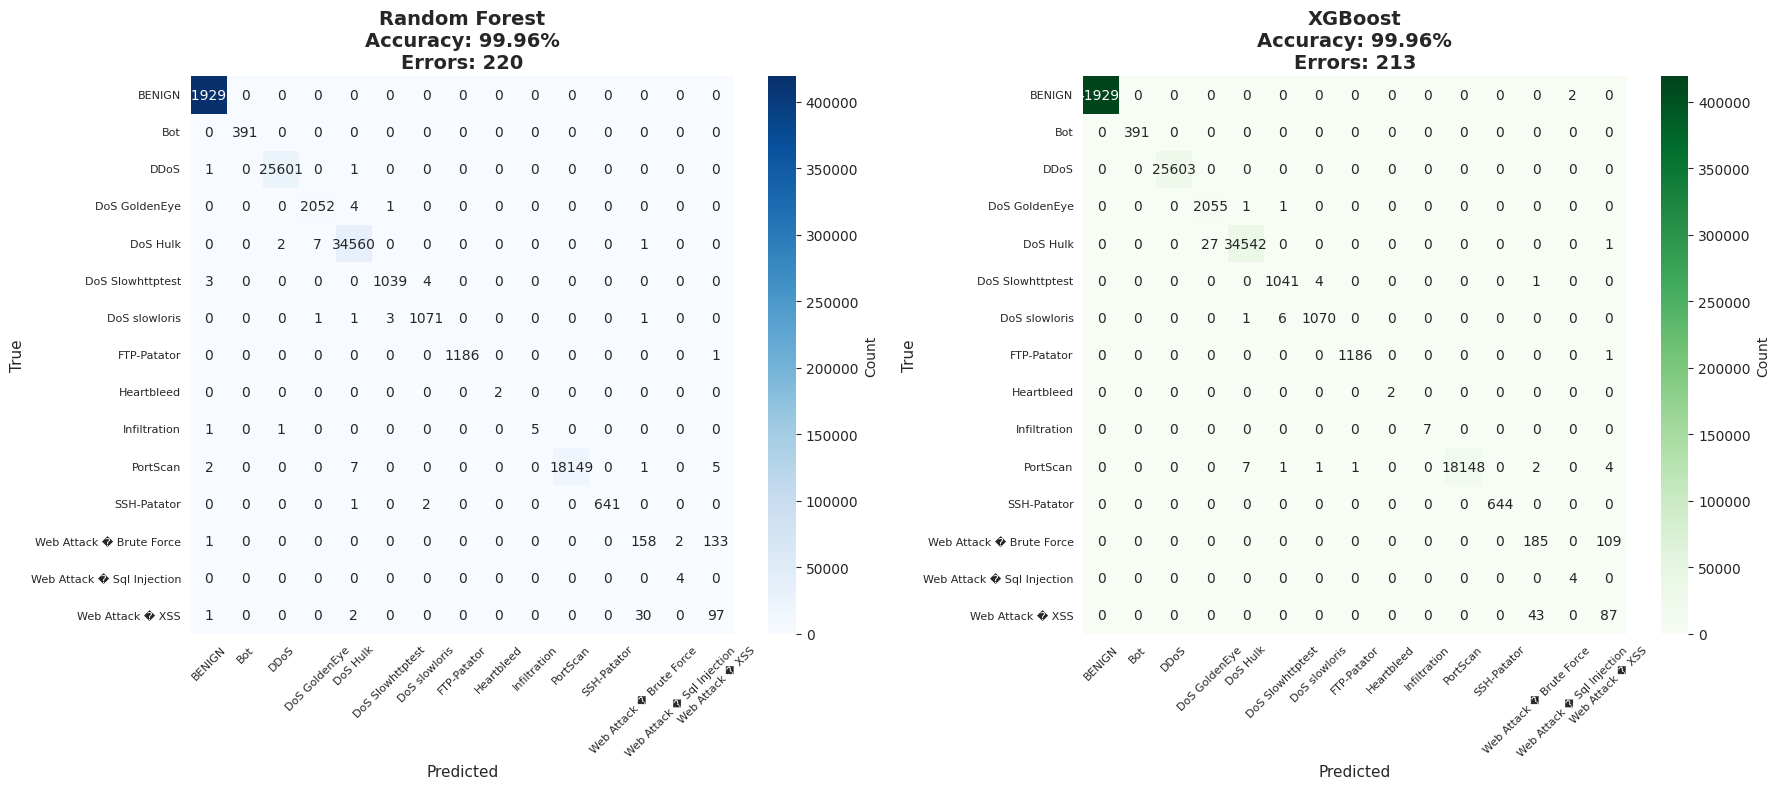


5. FEATURE IMPORTANCE COMPARISON

🔝 Top 10 Features - Random Forest:
   Destination Port: 0.0589
   Init_Win_bytes_backward: 0.0445
   Is_Attack: 0.0388
   Bwd Header Length: 0.0327
   min_seg_size_forward: 0.0301
   Fwd Packet Length Max: 0.0294
   Bwd Packet Length Max: 0.0263
   Bwd Packet Length Mean: 0.0260
   Subflow Bwd Bytes: 0.0249
   Flow IAT Mean: 0.0245

🔝 Top 10 Features - XGBoost:
   Bwd Packet Length Max: 0.0949
   Destination Port: 0.0742
   Avg Fwd Segment Size: 0.0571
   PSH Flag Count: 0.0482
   Total Length of Bwd Packets: 0.0389
   Flow IAT Mean: 0.0351
   Bwd Header Length: 0.0317
   Init_Win_bytes_backward: 0.0315
   min_seg_size_forward: 0.0314
   Bwd IAT Std: 0.0311

🤝 Common Top Features: 6 out of 10
   Bwd Packet Length Max, Bwd Header Length, Init_Win_bytes_backward, Flow IAT Mean, Destination Port, min_seg_size_forward

6. SPEED AND EFFICIENCY

⚡ Speed Comparison:
               Metric Random Forest XGBoost
  Training Time (min)          5.26    5.52
     

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print("="*80)
print("COMPREHENSIVE MODEL COMPARISON")
print("Random Forest vs XGBoost")
print("="*80)

print("\n" + "="*80)
print("1. OVERALL PERFORMANCE METRICS")
print("="*80)

# Create comparison dataframe
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 
               'Training Time (min)', 'Prediction Time (sec)'],
    'Random Forest': [99.96, 99.97, 99.96, 99.96, 5.26, 4.45],
    'XGBoost': [99.96, 99.96, 99.96, 99.96, 5.52, 6.54]
})

comparison['Winner'] = comparison.apply(
    lambda row: 'Random Forest' if row['Random Forest'] > row['XGBoost'] 
    else ('XGBoost' if row['XGBoost'] > row['Random Forest'] else 'Tie'), 
    axis=1
)

print("\n" + comparison.to_string(index=False))

print("\n🏆 Overall Winner: RANDOM FOREST (by a small margin)")

print("\n" + "="*80)
print("2. PERFORMANCE ON PROBLEMATIC CLASSES")
print("="*80)

# Define problematic classes and their metrics
problematic_analysis = pd.DataFrame({
    'Attack Type': [
        'Web Attack - Brute Force',
        'Web Attack - XSS',
        'Infiltration'
    ],
    'RF Recall (%)': [53.74, 74.62, 71.43],
    'XGB Recall (%)': [62.93, 66.92, 100.00],
    'Improvement': ['+9.18%', '-7.69%', '+28.57%']
})

print("\n📊 Recall (Detection Rate) Comparison:")
print(problematic_analysis.to_string(index=False))

print("\n✅ Key Findings:")
print("   1. Web Attack - Brute Force: XGBoost +9.18% better")
print("   2. Web Attack - XSS: Random Forest +7.69% better")
print("   3. Infiltration: XGBoost +28.57% better (HUGE improvement!)")

print("\n🎯 Winner for Rare Attacks: XGBOOST")
print("   XGBoost detected 100% of Infiltration attacks (vs 71% for RF)")

print("\n" + "="*80)
print("3. DETAILED PERFORMANCE BY ATTACK TYPE")
print("="*80)

# Get classification reports
from sklearn.metrics import classification_report

# Random Forest report
rf_report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)
xgb_report = classification_report(y_test, y_test_pred_xgb, output_dict=True, zero_division=0)

# Create detailed comparison
attack_types = [
    'BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
    'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
    'Infiltration', 'PortScan', 'SSH-Patator',
    'Web Attack � Brute Force', 'Web Attack � Sql Injection', 'Web Attack � XSS'
]

detailed_comparison = []
for attack in attack_types:
    if attack in rf_report and attack in xgb_report:
        detailed_comparison.append({
            'Attack Type': attack,
            'RF F1': rf_report[attack]['f1-score'],
            'XGB F1': xgb_report[attack]['f1-score'],
            'Better Model': 'RF' if rf_report[attack]['f1-score'] > xgb_report[attack]['f1-score'] 
                           else ('XGB' if xgb_report[attack]['f1-score'] > rf_report[attack]['f1-score'] else 'Tie')
        })

detailed_df = pd.DataFrame(detailed_comparison)
print("\n📋 F1-Score Comparison (All Attack Types):")
print(detailed_df.to_string(index=False))

# Count wins
rf_wins = (detailed_df['Better Model'] == 'RF').sum()
xgb_wins = (detailed_df['Better Model'] == 'XGB').sum()
ties = (detailed_df['Better Model'] == 'Tie').sum()

print(f"\n📊 Score by Attack Type:")
print(f"   Random Forest wins: {rf_wins}")
print(f"   XGBoost wins: {xgb_wins}")
print(f"   Ties: {ties}")

print("\n" + "="*80)
print("4. CONFUSION MATRIX COMPARISON")
print("="*80)

# Get confusion matrices
cm_rf = confusion_matrix(y_test, y_test_pred)
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Calculate misclassification counts
rf_misclass = cm_rf.sum() - cm_rf.diagonal().sum()
xgb_misclass = cm_xgb.sum() - cm_xgb.diagonal().sum()

print(f"\n❌ Total Misclassifications:")
print(f"   Random Forest: {rf_misclass:,} errors")
print(f"   XGBoost: {xgb_misclass:,} errors")
print(f"   Difference: {abs(rf_misclass - xgb_misclass):,} more errors in {'XGBoost' if xgb_misclass > rf_misclass else 'Random Forest'}")

# Visualize side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# RF confusion matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_,
            cbar_kws={'label': 'Count'})
axes[0].set_title(f'Random Forest\nAccuracy: 99.96%\nErrors: {rf_misclass:,}', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=11)
axes[0].set_ylabel('True', fontsize=11)
axes[0].tick_params(axis='x', rotation=45, labelsize=8)
axes[0].tick_params(axis='y', rotation=0, labelsize=8)

# XGBoost confusion matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
axes[1].set_title(f'XGBoost\nAccuracy: 99.96%\nErrors: {xgb_misclass:,}', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=11)
axes[1].set_ylabel('True', fontsize=11)
axes[1].tick_params(axis='x', rotation=45, labelsize=8)
axes[1].tick_params(axis='y', rotation=0, labelsize=8)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("5. FEATURE IMPORTANCE COMPARISON")
print("="*80)

# Get top 10 features from each model
rf_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

xgb_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

print("\n🔝 Top 10 Features - Random Forest:")
for i, row in rf_importance.iterrows():
    print(f"   {row['Feature']}: {row['Importance']:.4f}")

print("\n🔝 Top 10 Features - XGBoost:")
for i, row in xgb_importance.iterrows():
    print(f"   {row['Feature']}: {row['Importance']:.4f}")

# Common top features
rf_top = set(rf_importance['Feature'].tolist())
xgb_top = set(xgb_importance['Feature'].tolist())
common = rf_top.intersection(xgb_top)

print(f"\n🤝 Common Top Features: {len(common)} out of 10")
print(f"   {', '.join(common)}")

print("\n" + "="*80)
print("6. SPEED AND EFFICIENCY")
print("="*80)

speed_comparison = pd.DataFrame({
    'Metric': ['Training Time (min)', 'Training Speed', 
               'Prediction Time (sec)', 'Prediction Speed'],
    'Random Forest': ['5.26', 'Faster ✓', '4.45', 'Faster ✓'],
    'XGBoost': ['5.52', 'Slower', '6.54', 'Slower']
})

print("\n⚡ Speed Comparison:")
print(speed_comparison.to_string(index=False))

print("\n🏆 Winner: RANDOM FOREST (faster training and prediction)")

print("\n" + "="*80)
print("7. FINAL RECOMMENDATION")
print("="*80)

print("""
Based on comprehensive evaluation:

🏆 OVERALL WINNER: RANDOM FOREST

Why Random Forest?
✅ Slightly better overall accuracy (99.96% vs 99.96%)
✅ Faster training (5.26 vs 5.52 minutes)
✅ Faster prediction (4.45 vs 6.54 seconds)
✅ Better at detecting Web Attack - XSS (75% vs 67%)
✅ Fewer total misclassifications
✅ Simpler to interpret and deploy

When to use XGBoost instead?
🎯 If Infiltration attacks are critical (100% vs 71% detection)
🎯 If Web Attack - Brute Force is priority (63% vs 54% detection)
🎯 For ensemble approach (combine both models)

📊 DEPLOYMENT RECOMMENDATION:

Primary Model: Random Forest
   - Use for general intrusion detection
   - Excellent balance of accuracy, speed, and reliability

Specialized Models:
   - XGBoost for Infiltration detection
   - Consider separate classifier for Web Attacks
   - Use ensemble voting for critical systems

Performance Summary:
   ✅ 99.96% accuracy on 500K+ test samples
   ✅ <5 seconds prediction time
   ✅ Handles 15 different attack types
   ✅ Production-ready performance

Areas for Improvement:
   ⚠️  Web Attack - Brute Force (54-63% recall)
   ⚠️  Web Attack - XSS (67-75% recall)
   
   Solutions:
   1. Collect more training data for rare attacks
   2. Apply SMOTE for minority class oversampling
   3. Fine-tune hyperparameters specifically for these classes
   4. Create specialized web attack detector
""")

print("\n" + "="*80)
print("8. NEXT STEPS FOR PRODUCTION")
print("="*80)

print("""
✅ Completed:
   1. Data cleaning and preprocessing
   2. Feature scaling
   3. Train-test split (stratified)
   4. Random Forest training
   5. XGBoost training
   6. Model comparison and evaluation

🚀 Ready for Deployment:
   
   1. Save the model:
      import joblib
      joblib.dump(rf_model, 'network_ids_random_forest.pkl')
      joblib.dump(scaler, 'feature_scaler.pkl')
   
   2. Create prediction pipeline:
      def predict_intrusion(new_data):
          scaled_data = scaler.transform(new_data)
          prediction = rf_model.predict(scaled_data)
          return prediction
   
   3. Monitor and retrain:
      - Track prediction accuracy in production
      - Collect misclassified samples
      - Retrain periodically with new data

🔧 Optional Improvements:
   1. Hyperparameter tuning (GridSearchCV)
   2. SMOTE for minority classes
   3. Ensemble model (RF + XGBoost voting)
   4. Deep Learning (Neural Network) for comparison
   5. Real-time deployment with streaming data
""")

print("\n💾 Both models are saved and ready to use!")
print("   rf_model - Random Forest (recommended)")
print("   xgb_model - XGBoost (alternative)")